# EXPORT SALES DATA FOR ABCD LTD
## ANALYSIS OF EXPORT SALES FROM APRIL 2019 TO SEPTRMBER 2022


In [43]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import geopandas as gpd
import warnings

In [44]:
# Suppress warnings
warnings.filterwarnings("ignore")

## DATA INFORMATION

In [45]:
#load data from source
#Data source from kraggle.com
#link: https://www.kaggle.com/datasets/susangrapes/fmcg-export-sales
df = pd.read_csv("C:/Users/Lenovo/Desktop/Udemy_Python/Project_1/ExportSales.csv")
Final_report = "Kindly note that the detailed report for this analysis has been uploaded to the folder. Thank you."

In [46]:
#check the data shape
df.shape

(7811, 9)

In [47]:
#check the data for duplication
if df.duplicated().any(axis=None):
    print("Duplicates found in either columns or rows.")
else:
    print("No duplication.")


No duplication.


In [48]:
#View df
df.head(2)

,Product ID,Date,Category,Invoice Number,Product Code,Customer Code,Destination,Quantity,Total Price
0,2529604,4/28/2019,Category5,267,30011006,612,IRQ,750,3334.8225
1,2529605,4/29/2019,Category5,302,30011006,514,BHR,400,3032.8240


## DATA CLEANING & MODIFICATION

In [49]:
# Check for missing values
if df.isnull().values.any():
    missing_count = df.isnull().sum().sum()
    total_cells = df.size
    missing_percentage = (missing_count / total_cells) * 100

    print(f"Yes, there are {missing_count} missing values.")
    print(f"This represents {missing_percentage:.2f}% of the entire dataset.")

    # Check if missing percentage is less than 1%
    if missing_percentage < 1.0:
        # If the missing percentage is below 1%, drop rows
        df = df.dropna()
        print("Missing values dropped.")
    else:
        print("Missing percentage is greater than or equal to 1%, no rows dropped.")
else:
    print("No missing values found.")


Yes, there are 110 missing values.
This represents 0.16% of the entire dataset.
Missing values dropped.


In [50]:
# Check for duplicates based on subset of columns
duplicates_before_removal = df[df.duplicated(subset=['Invoice Number', 'Quantity', 'Total Price', 'Product Code'], keep=False)]

if duplicates_before_removal.empty:
    print("No duplicates found.")
else:
    total_duplicates_before = duplicates_before_removal.shape[0]  # Count the total number of duplicate rows
    total_rows_before = df.shape[0]  # Total number of rows in the DataFrame
    percentage_duplicates_before = (total_duplicates_before / total_rows_before) * 100
    print(f"Total duplicates found before removal: {total_duplicates_before}")
    print(f"Percentage of duplicates before removal: {percentage_duplicates_before:.2f}%")

    # Remove duplicates
    df.drop_duplicates(subset=['Invoice Number', 'Quantity', 'Total Price', 'Product Code'], keep='first', inplace=True)

    print("Duplicates removed.")

# Check for duplicates after removal
duplicates_after_removal = df[df.duplicated(subset=['Invoice Number', 'Quantity', 'Total Price', 'Product Code'], keep=False)]

if duplicates_after_removal.empty:
    print("No duplicates found after removal.")


Total duplicates found before removal: 1382
Percentage of duplicates before removal: 17.95%
Duplicates removed.
No duplicates found after removal.


In [51]:
import pycountry_convert as pc

#Modify df
#Adding New Columns 

# Add Actual Unit price
df['Price'] = (df['Total Price'] / df['Quantity']).round(2)

#Add Sales
# Calculate 'Sales' by multiplying 'Quantity' and 'Average_Unit_Price'
df['Sales'] = df['Quantity'] * df['Price']

# Add Country Name
# Replace 'UAE' with 'ARE' in the 'Destination' column
df['Destination'] = df['Destination'].replace('UAE', 'ARE')

# Mapping between country codes and country names using pycountry library
def get_country_name(code):
    try:
        country = pycountry.countries.get(alpha_3=code)
        return country.name
    except AttributeError:
        return None

# Add a new column 'Country Name' based on the mapping
df['Country'] = df['Destination'].apply(get_country_name)

#Mapping to continent
def get_continent(row):
    cn_code = pc.country_name_to_country_alpha2(row['Country'], cn_name_format="default")
    conti = pc.country_alpha2_to_continent_code(cn_code)
    return conti
    
# Add a new column 'Continent' based on the alpha-3 country code
df['Continent'] = df.apply(get_continent, axis = 1)

#Mappin to Continent name
conti_names = {
    'AF': 'Africa',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America',
    'OC': 'Oceania',
    'AN': 'Antarctica'
}

df['Continent'] = df['Continent'].map(conti_names)

# Convert 'Date' column to datetime format and extract components in one step
df['Date_Time'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date_Time'].dt.date
df['Month'] = df['Date_Time'].dt.month_name()
df['Year'] = df['Date_Time'].dt.year
df['Day_Name'] = df['Date_Time'].dt.day_name()
df['Quarter'] = df['Date_Time'].dt.to_period("Q")

#Remove Unused columns
Unused_column = ["Invoice Number", "Total Price"]
df = df.drop(columns=Unused_column)

#Rename column
df = df.rename(columns={'Destination': 'ISO_Code'})

In [52]:
#View df after modificatin
df.tail(10)

,Product ID,Date,Category,Product Code,Customer Code,ISO_Code,Quantity,Price,Sales,Country,Continent,Date_Time,Month,Year,Day_Name,Quarter
7801,2537405,2022-09-14,Category7,30006046,19,IRQ,3300,10.87,35871.00,Iraq,Asia,2022-09-14,September,2022,Wednesday,2022Q3
7802,2537406,2022-09-14,Category7,30006047,7,IRQ,350,10.87,3804.50,Iraq,Asia,2022-09-14,September,2022,Wednesday,2022Q3
7803,2537407,2022-09-14,Category7,30006046,7,IRQ,1000,10.87,10870.00,Iraq,Asia,2022-09-14,September,2022,Wednesday,2022Q3
7804,2537408,2022-09-14,Category7,30006045,7,IRQ,1500,10.87,16305.00,Iraq,Asia,2022-09-14,September,2022,Wednesday,2022Q3
7805,2537409,2022-09-14,Category7,30006047,7,IRQ,560,10.87,6087.20,Iraq,Asia,2022-09-14,September,2022,Wednesday,2022Q3
7806,2537410,2022-09-14,Category7,30006046,7,IRQ,1203,10.87,13076.61,Iraq,Asia,2022-09-14,September,2022,Wednesday,2022Q3
7807,2537411,2022-09-14,Category7,30006045,7,IRQ,1087,10.87,11815.69,Iraq,Asia,2022-09-14,September,2022,Wednesday,2022Q3
7808,2537412,2022-09-19,Category7,30006045,19,IRQ,3300,10.97,36201.00,Iraq,Asia,2022-09-19,September,2022,Monday,2022Q3
7809,2537413,2022-09-19,Category7,30006003,603,AZE,4182,9.22,38558.04,Azerbaijan,Asia,2022-09-19,September,2022,Monday,2022Q3
7810,2537414,2022-09-19,Category7,30006030,603,AZE,526,12.08,6354.08,Azerbaijan,Asia,2022-09-19,September,2022,Monday,2022Q3


In [53]:
# Recheck restructured df for missing values or zeros
if df.isnull().values.any() or (df == 0).any().any():
    missing_count = df.isnull().sum().sum()
    zero_count = (df == 0).sum().sum()
    total_cells = df.size
    missing_zero_count = missing_count + zero_count
    missing_zero_percentage = (missing_zero_count / total_cells) * 100

    print(f"Yes, there are {missing_count} missing values and {zero_count} zero values.")
    print(f"This represents {missing_zero_percentage:.2f}% of the entire dataset.")

    # Check if missing and zero percentage is less than 1%
    if missing_zero_percentage < 1.0:
        # If the missing and zero percentage is below 1%, drop rows
        df = df.replace(0, np.nan).dropna()
        print("Missing and zero values dropped.")
    else:
        print("Missing and zero percentage is greater than or equal to 1%, no rows dropped.")
else:
    print("No missing or zero values found.")


Yes, there are 0 missing values and 12 zero values.
This represents 0.01% of the entire dataset.
Missing and zero values dropped.


# OBJECTIVE 1: COUNTRY MARKET ANALYSIS
            Goal: To examine export sales accross countries

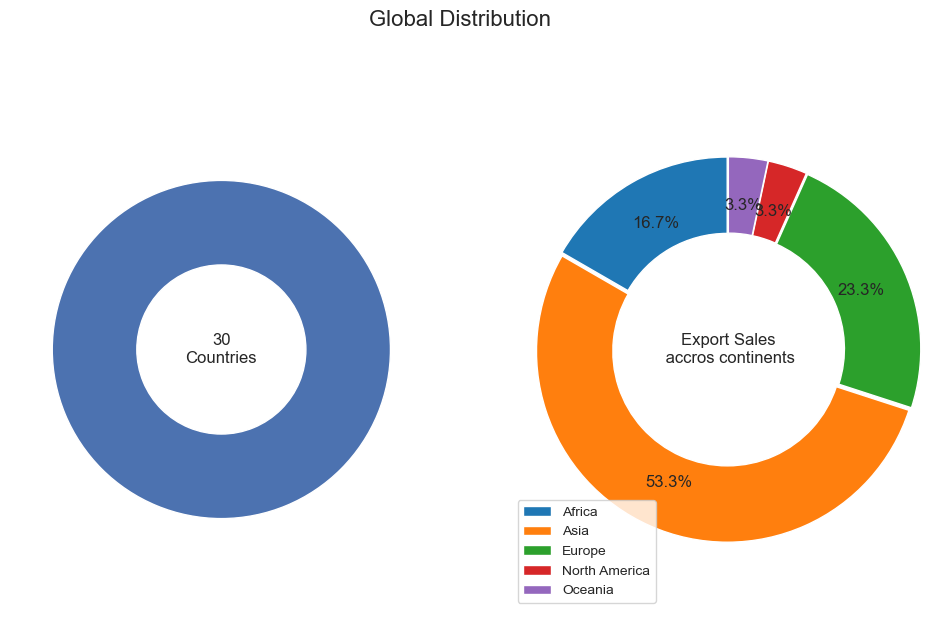

In [54]:
#Global Distribution

# Numbers of featured country
Featured_Country = df['Country'].nunique() 

# Group Country names by Continent and find the unique count and percentage
continent_expsales = df.groupby('Continent')['Country'].nunique()
continent_percentage = df.groupby('Continent')['Country'].nunique() / df['Country'].nunique() * 100

# Concatenate unique count and percentage into a DataFrame
continent_summary = pd.concat([continent_expsales, continent_percentage], axis=1)
continent_summary.columns = ['No of Country', 'Percentage']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

# Title
fig.suptitle('Global Distribution', fontsize=16)

# Pie chart for Featured Countries
axs[0].pie([Featured_Country], labels=[''], autopct='', startangle=90, wedgeprops=dict(width=0.5))
axs[0].text(0, 0, f'{Featured_Country}\nCountries', va='center', ha='center', fontsize=12)
axs[0].set_title('')

# Donut chart for Continent
labels = continent_summary.index
sizes = continent_summary['No of Country']
colors = plt.cm.tab10.colors[:len(labels)]  # Using default color palette
explode = [0.01] * len(labels)  # Explode each segment slightly

# Pie chart for donut
wedges, _, autotexts = axs[1].pie(sizes, labels=[''] * len(continent_summary), colors=colors, autopct='%1.1f%%', 
                                   pctdistance=0.75, startangle=90, explode=explode, 
                                   wedgeprops=dict(width=0.4, edgecolor='w'))

# Equal aspect ratio ensures that pie is drawn as a circle
axs[1].axis('equal')

# Title
axs[1].text(0, 0, 'Export Sales\n accros continents', va='center', ha='center', fontsize=12)
axs[1].set_title('')


# Add legend
axs[1].legend(wedges, continent_summary.index, loc=(0.0009, 0.03), fontsize='small')

# Show plot
plt.show()


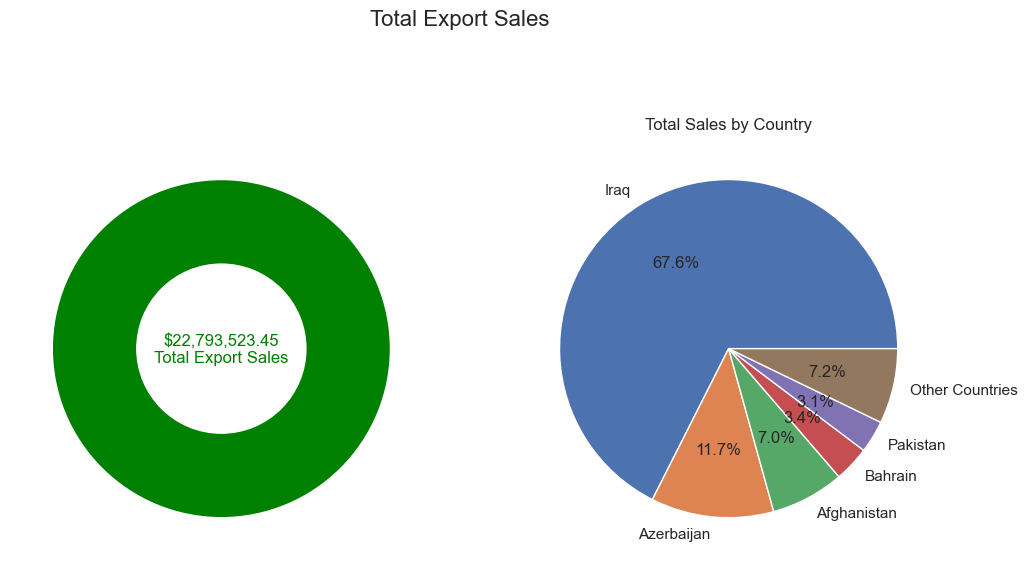

In [55]:
#Total Export Sales
# Calculate sum of Total_Sales
total_export_sales = df['Sales'].sum()

# Format total_export_sales as currency
total_export_sales_str = '${:,.2f}'.format(total_export_sales)

# Get top 5 countries
top_countries = df.groupby('Country')['Sales'].sum().nlargest(5)

# Combine other countries
other_countries_sales = df.groupby('Country')['Sales'].sum().nsmallest(len(df['Country'].unique()) - 5).sum()
top_countries['Other Countries'] = other_countries_sales

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

# Title
fig.suptitle('Total Export Sales', fontsize=16)

# Pie chart for Total Export Sales
axs[0].pie([total_export_sales], labels=[''], autopct='', startangle=90, wedgeprops=dict(width=0.5, edgecolor='w'), colors=['green'])
axs[0].text(0, 0, f'{total_export_sales_str}\nTotal Export Sales', va='center', ha='center', fontsize=12, color='green')
axs[0].set_title('')

# Create pie chart for top countries with percentages
axs[1].pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
axs[1].set_title('Total Sales by Country')

# Show the plots
plt.show()


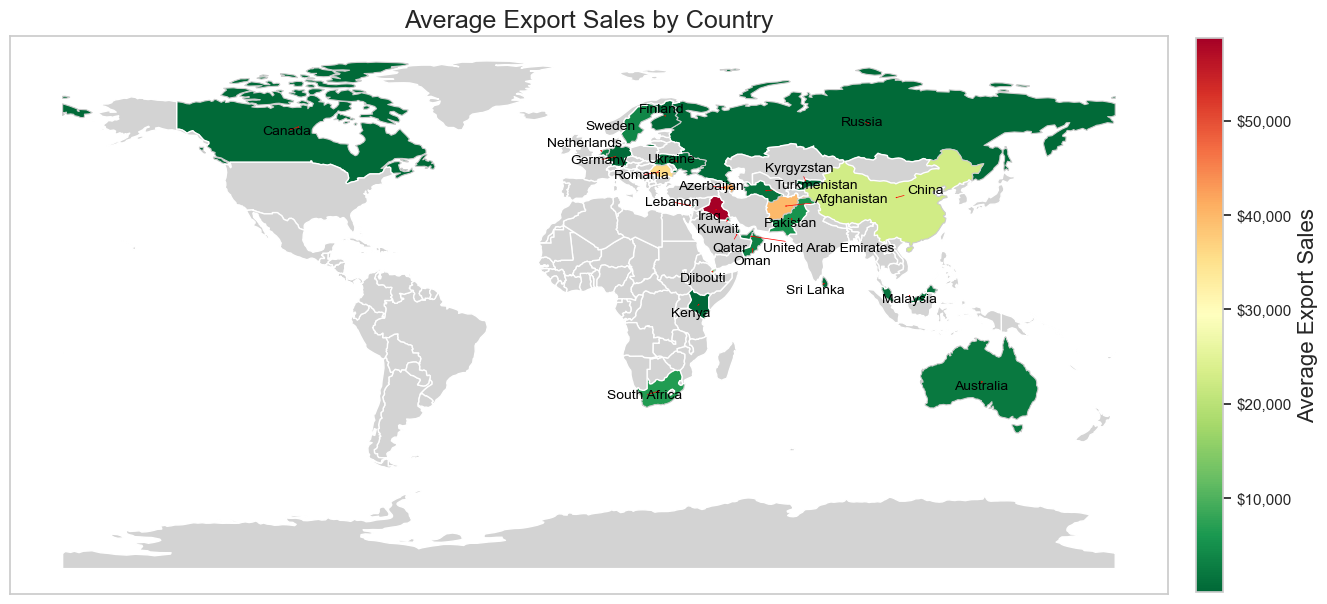

In [56]:
# Average Export Sales by Country

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FuncFormatter  # Add this line for FuncFormatter
from adjustText import adjust_text

# Group by Country and Product code, calculate average unit price and total quantity
country_stats = df.groupby(['ISO_Code', 'Product Code']).agg(
    Average_Unit_Price=('Price', 'mean'),
    Tot_Quantity=('Quantity', 'sum')
).reset_index()

# Calculate total sales for each country
country_stats['Tot_sales'] = (country_stats['Tot_Quantity'] * country_stats['Average_Unit_Price'])

# Group by Destination and mean total sales
total_sales_by_destination = country_stats.groupby('ISO_Code')['Tot_sales'].mean().reset_index()

#Create country Map of Export sales
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from adjustText import adjust_text  # Import the adjust_text function

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Load the world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the GeoDataFrame with the total sales data based on country codes or names
merged = world.merge(total_sales_by_destination, left_on='iso_a3', right_on='ISO_Code', how='left')

# Separate into two GeoDataFrames: one with sales data and one without
countries_with_sales = merged.dropna(subset=['Tot_sales'])
countries_without_sales = merged[merged['Tot_sales'].isna()]

# Drop rows with NaN values in 'Tot_Sales' column
countries_with_sales = countries_with_sales.dropna(subset=['Tot_sales'])

# Plot the choropleth map with different colors
fig, ax = plt.subplots(1, 1, figsize=(18, 12))

# Plot countries with sales using a sequential color map (Blues)
cmap = 'RdYlGn_r'
norm = Normalize(vmin=countries_with_sales['Tot_sales'].min(), vmax=countries_with_sales['Tot_sales'].max())
sm = ScalarMappable(cmap=cmap, norm=norm)
countries_with_sales.plot(column='Tot_sales', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Add colorbar to the right of the map with adjusted height
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, shrink=0.6, format=FuncFormatter(lambda x, _: f"${int(x):,}"))
cbar.set_label('Average Export Sales', fontsize=16)

# Plot countries without sales in light gray
countries_without_sales.plot(color='lightgray', ax=ax)

# Add country names as annotations using adjust_text
texts = [plt.text(x, y, label, fontsize=10, color='black') for x, y, label in
         zip(countries_with_sales.geometry.centroid.x, countries_with_sales.geometry.centroid.y, countries_with_sales['name'])]

# Use adjust_text to automatically adjust text positions
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

# Set aspect ratio to 'equal'
ax.set_aspect('equal')

# Set axis labels and title
ax.set_title('Average Export Sales by Country', fontsize=18)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Remove gridlines
ax.grid(False)

# Display the map
plt.show()

In [14]:
#Cumulatetive Sales by Country over time

import bar_chart_race as bcr

# Group by 'Country', 'Product Code', and 'Date', then sum 'Total_Sales' for each group
result_df = df.groupby(['Country', 'Product Code', 'Date_Time'], as_index=False)['Sales'].sum()

# Create a pivot table
pivot_df = pd.pivot_table(result_df, values='Sales', index=['Date_Time'], columns=['Country'], aggfunc='sum')

# Replace NaN values with zero
pivot_df_filled = pivot_df.fillna(0)

# Calculate the cumulative sum for each column
cumulative_df2 = pivot_df_filled.cumsum()

Warning: Running this code will generate a video showing export Sales over time, 
         and the process may take approximately 20 minutes to complete. 
         Please be patient during the execution or proceed to the next or acess the Video
         via https://streamable.com/mymgy1

In [15]:
#Plot Chart for Cumulatetive Sales by Country over time

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import bar_chart_race as bcr
# Plot the horizontal bar chart race
bcr.bar_chart_race(
    df=cumulative_df2,
    filename='sales_by_country4.mp4',  # Specify the filename for the video
    orientation='h',
    sort='desc',
    n_bars=10,  # You can adjust the number of bars to display
    fixed_order=False,
    steps_per_period=10,
    period_length=500,  # You can adjust the period length in milliseconds

    # Parameters related to animation appearance
    interpolate_period=True,  # Smoothly interpolate between periods
    label_bars=True,  # Display labels on the bars
    bar_size=.95,  # Adjust the size of the bars
    figsize=(10, 8),  # Adjust the size of the figure
    cmap='dark12',  # Choose a different colormap

    # Parameters related to video metadata
    title='Total Sales by Country (TOP 10)',  # Specify the title of the video
    title_size=18,  # Adjust the size of the title
    tick_label_size=10,  # Adjust the size of tick labels
    filter_column_colors=True,

    # Parameters related to color customization
    bar_kwargs={'alpha': 0.7},  # Adjust transparency of bars
    period_label={'x': 0.6, 'y': 0.1, 'size': 10, 'color': 'black', 'weight': 'bold'},  # Customize period label

    # Parameters related to font customization
    shared_fontdict={'family': 'Arial', 'color': '.1'},  # Adjust font family and color

    # Parameters related to speed and quality
    writer='ffmpeg',  # Specify the video writer (use 'pillow' for lower quality, but faster)
    dpi=300,  # Adjust the dots per inch (higher values result in higher quality but larger file sizes)
    period_summary_func=lambda v, r: {'x': 0.7, 'y': 0.2, 's': f'Total Sales: ${v.sum():,.0f}', 'ha': 'left', 'size': 10, 'weight': 'bold'},
    
)

# Save Video with the specified filename ('sales_by_country.mp4')


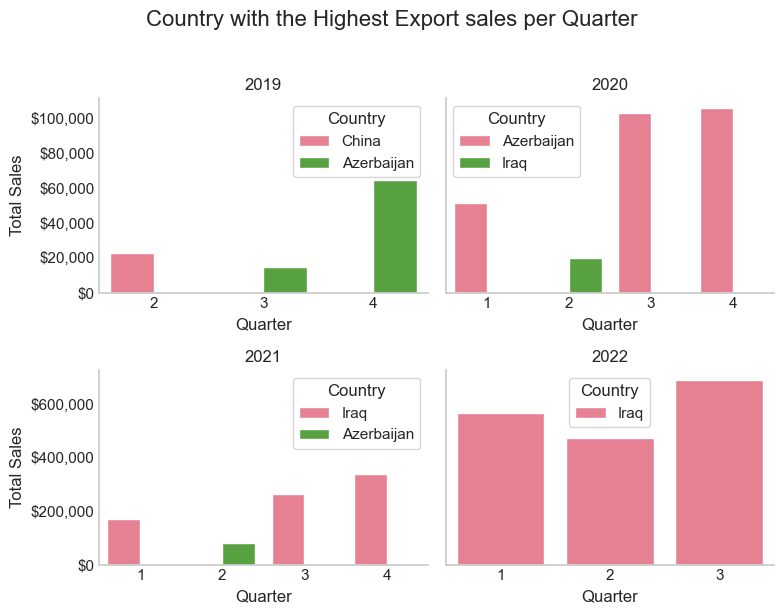

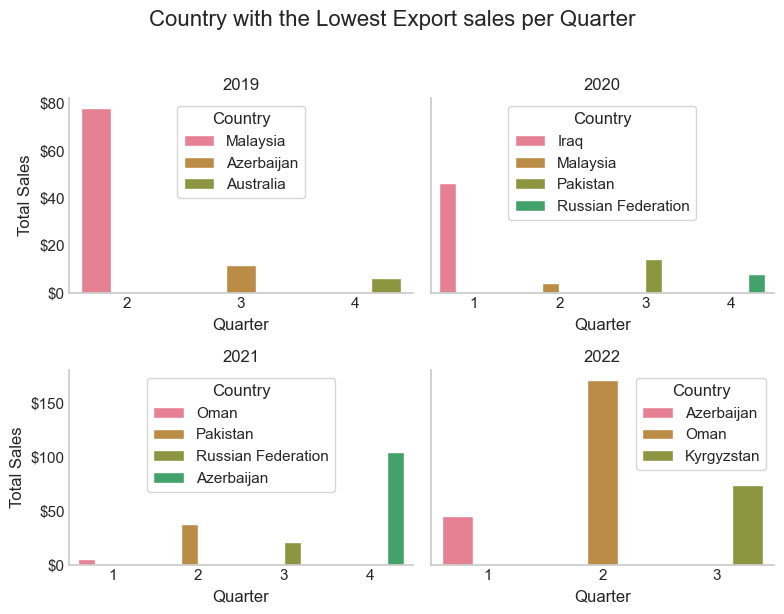

In [57]:
#Export sales per quater by Country

# Group Quarterly data
quarterly_sales = df.groupby(['Quarter', 'Product Code', 'Country'])['Sales'].sum().reset_index()

# Get the country with the highest sales for each quarter
highest_sales_per_quarter = quarterly_sales.loc[quarterly_sales.groupby('Quarter')['Sales'].idxmax()]

# Extract quarter and year from the 'Quarter' column
highest_sales_per_quarter[['Year', 'Quarter']] = highest_sales_per_quarter['Quarter'].apply(
    lambda x: pd.Series([x.year, x.quarter])
)

# Separate data for each year
years = highest_sales_per_quarter['Year'].unique()

# Create subplots for each year
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharey="row")

# Define a color palette for countries
palette = sns.color_palette('husl', n_colors=len(highest_sales_per_quarter['Country'].unique()))

for i, year in enumerate(years):
    data_year = highest_sales_per_quarter[highest_sales_per_quarter['Year'] == year]

    row, col = divmod(i, 2)

    sns.barplot(
        data=data_year, x='Quarter', y='Sales', hue='Country',
        palette=palette, ax=axes[row, col]
    )

    axes[row, col].set_title(f'{year}', fontsize=12)
    axes[row, col].set_xlabel('Quarter')
    axes[row, col].set_ylabel('Total Sales' if col == 0 else '')  # Set y-axis title only for the first column
    axes[row, col].legend(title='Country')

    # Remove right y-axis and top x-axis lines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)

    # Remove ticks and gridlines
    axes[row, col].tick_params(axis='both', which='both', length=0)
    axes[row, col].xaxis.grid(False)
    axes[row, col].yaxis.grid(False)

    # Format y-axis labels in dollars
    axes[row, col].yaxis.set_major_formatter('${x:,.0f}')

    # Add a super title for the entire figure
fig.suptitle('Country with the Highest Export sales per Quarter', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

# Get the country with the lowest sales for each quarter
lowest_sales_per_quarter = quarterly_sales.loc[quarterly_sales.groupby('Quarter')['Sales'].idxmin()]

# Extract quarter and year from the 'Quarter' column
lowest_sales_per_quarter[['Year', 'Quarter']] = lowest_sales_per_quarter['Quarter'].apply(
    lambda x: pd.Series([x.year, x.quarter])
)

# Separate data for each year
years = lowest_sales_per_quarter['Year'].unique()

# Create subplots for each year
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharey="row")

# Define a color palette for countries
palette = sns.color_palette('husl', n_colors=len(lowest_sales_per_quarter['Country'].unique()))

for i, year in enumerate(years):
    data_year = lowest_sales_per_quarter[lowest_sales_per_quarter['Year'] == year]

    row, col = divmod(i, 2)

    sns.barplot(
        data=data_year, x='Quarter', y='Sales', hue='Country',
        palette=palette, ax=axes[row, col]
    )

    axes[row, col].set_title(f'{year}', fontsize=12)
    axes[row, col].set_xlabel('Quarter')
    axes[row, col].set_ylabel('Total Sales' if col == 0 else '')  # Set y-axis title only for the first column
    axes[row, col].legend(title='Country')

    # Remove right y-axis and top x-axis lines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)

    # Remove ticks and gridlines
    axes[row, col].tick_params(axis='both', which='both', length=0)
    axes[row, col].xaxis.grid(False)
    axes[row, col].yaxis.grid(False)

    # Format y-axis labels in dollars
    axes[row, col].yaxis.set_major_formatter('${x:,.0f}')

    # Set y-axis title for the leftmost subplots in each row
    if col == 0:
        axes[row, col].set_ylabel('Total Sales')
    
    # Add subplot Title
fig.suptitle('Country with the Lowest Export sales per Quarter', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

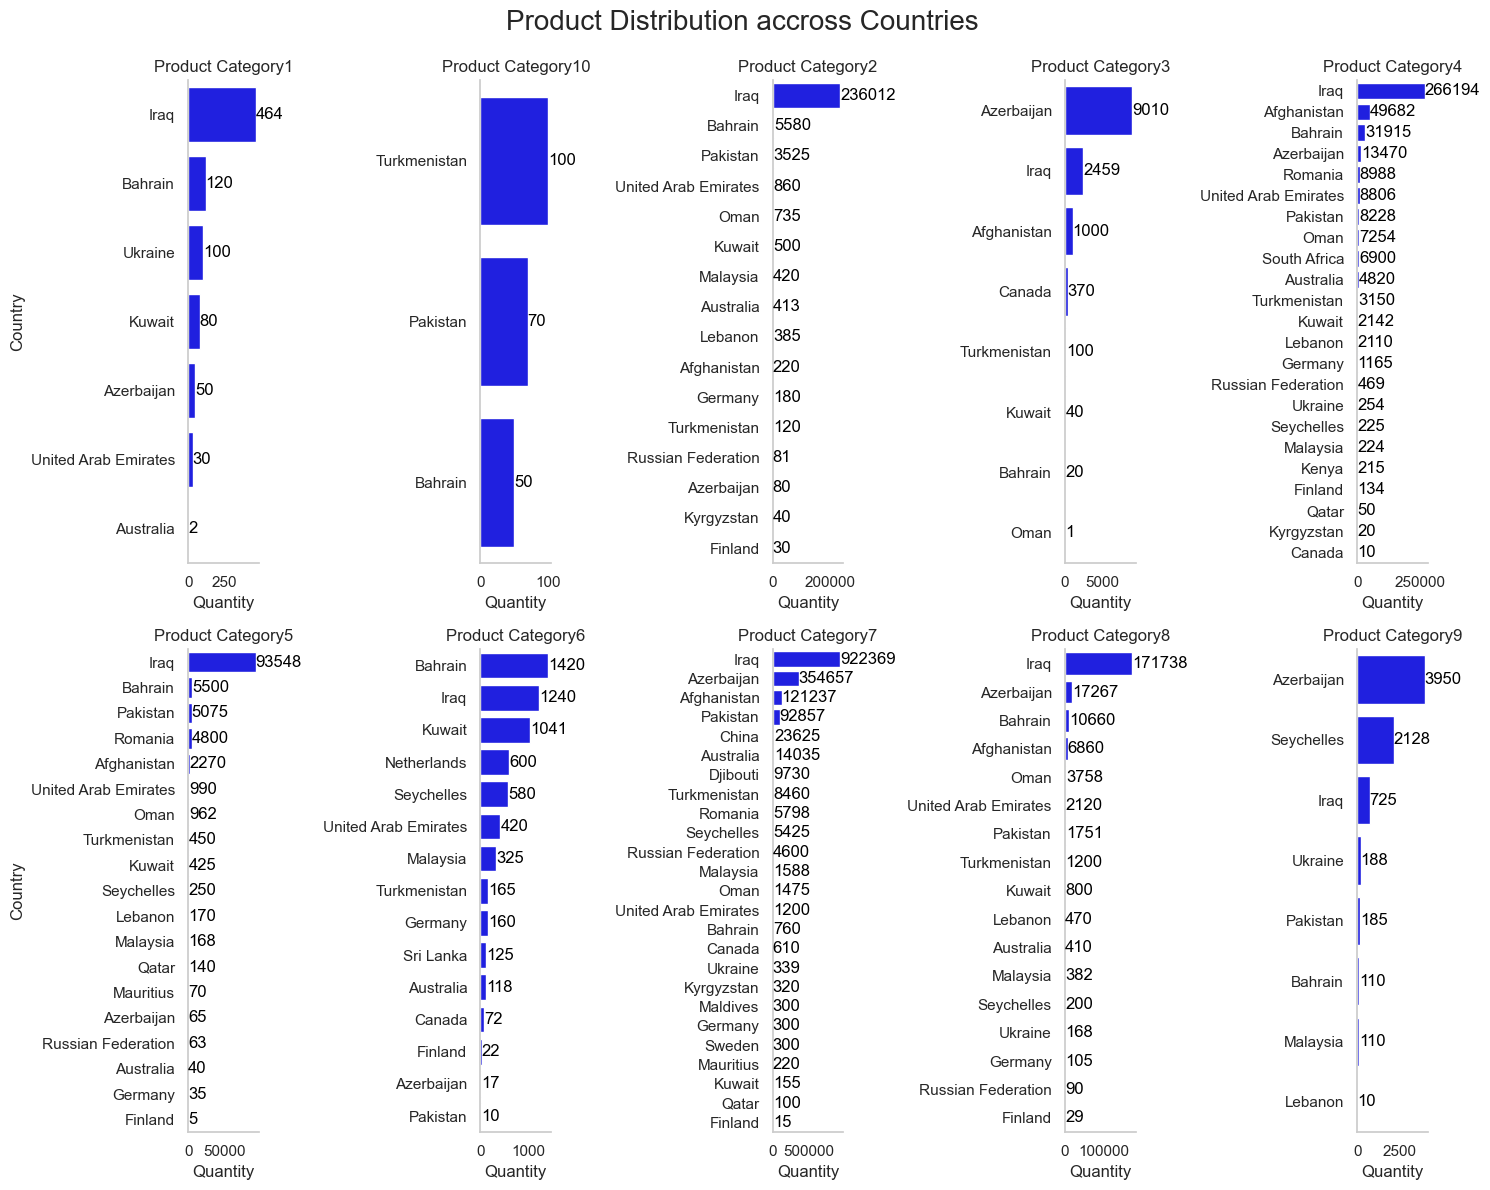

In [58]:
# Distribution of Product by Country

# Structure the data using the product category
Product_Distribution = df.groupby(['Category', 'Country'])['Quantity'].sum().reset_index()

# Rank destinations within each category based on total quantity
Product_Distribution['Rank'] = Product_Distribution.groupby('Category')['Quantity'].rank(ascending=False)

# Select the destinations for each category
Distribution_by_country = Product_Distribution

# Create a dictionary to store tables for each category
tables_by_category = {}

# Iterate over unique categories
for category in Distribution_by_country['Category'].unique():
    # Filter data for the current category
    category_data = Distribution_by_country[Distribution_by_country['Category'] == category]
    
    # Sort data by total quantity in descending order
    category_data = category_data.sort_values(by='Quantity', ascending=False)
    
    # Select top destinations
    top_destinations = category_data.head(31)[['Country', 'Quantity']]
    
    # Store the table in the dictionary
    tables_by_category[category] = top_destinations

# Create subplots in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 12))

# Add figure title
plt.suptitle('Product Distribution accross Countries', fontsize=20, ha='center', y=0.99)

# Display the bar charts in subplots with values inside the bars
for i, (category, table) in enumerate(tables_by_category.items()):
    row, col = divmod(i, 5)
    sns.barplot(x='Quantity', y='Country', data=table, color='blue', ax=axes[row, col])
    axes[row, col].set_title(f"Product {category}")
    axes[row, col].set_xlabel('Quantity')
    axes[row, col].set_ylabel('Country'if col == 0 else '')
    
   # Display values inside the bars
    for index, value in enumerate(table['Quantity']):
        axes[row, col].text(value, index, f'{value:.0f}', va='center', ha='left', color='black')
        
       # Remove right y-axis and top x-axis lines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)
    
        # Remove ticks and gridlines
    axes[row, col].xaxis.grid(False)
    axes[row, col].yaxis.grid(False)
    
       
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

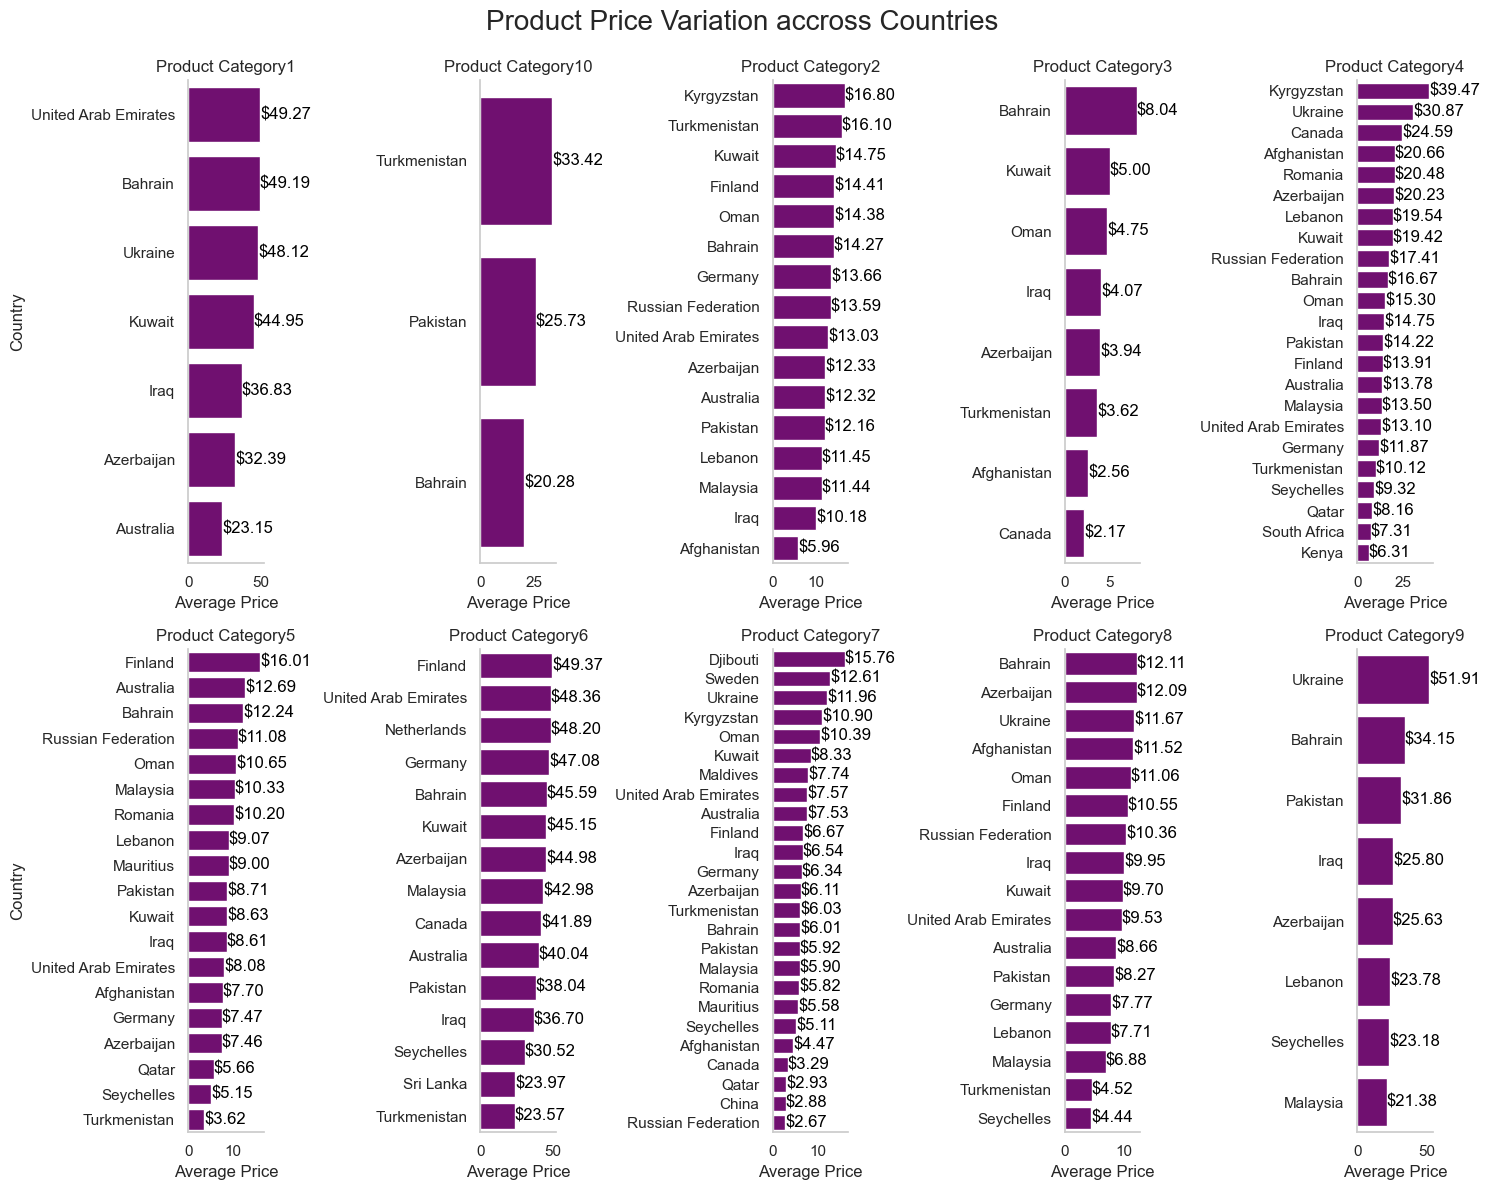

In [59]:
# Price Distribution of Product by Country based on Average Price

# Structure the data using the product category
Price_Distribution = df.groupby(['Category', 'Country'])['Price'].mean().reset_index()

# Rank destinations within each category based on average unit price
Price_Distribution['Rank'] = Price_Distribution.groupby('Category')['Price'].rank(ascending=False)

# Select the destinations for each category
Distribution_by_country = Price_Distribution

# Create a dictionary to store tables for each category
tables_by_category = {}

# Iterate over unique categories
for category in Distribution_by_country['Category'].unique():
    # Filter data for the current category
    category_data = Distribution_by_country[Distribution_by_country['Category'] == category]
    
    # Sort data by average unit price in descending order
    category_data = category_data.sort_values(by='Price', ascending=False)
    
    # Select Price 
    Pricedristribution_destinations = category_data.head(31)[['Country', 'Price']]
    
    # Store the table in the dictionary
    tables_by_category[category] = Pricedristribution_destinations

# Create subplots in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 12))
# Add figure title
plt.suptitle('Product Price Variation accross Countries', fontsize=20, ha='center', y=0.99)

# Display the bar charts in subplots with values inside the bars
for i, (category, table) in enumerate(tables_by_category.items()):
    row, col = divmod(i, 5)
    sns.barplot(x='Price', y='Country', data=table, color='purple', ax=axes[row, col])
    axes[row, col].set_title(f"Product {category}")
    axes[row, col].set_xlabel('Average Price')
    
    # Set y-axis label only for the leftmost column in each row
    axes[row, col].set_ylabel('Country' if col == 0 else '')

    # Display values inside the bars
    for index, value in enumerate(table['Price']):
        axes[row, col].text(value, index, f'${value:.2f}', va='center', ha='left', color='black')
        
    # Remove right y-axis and top x-axis lines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)
    axes[row, col].xaxis.grid(False)
    axes[row, col].yaxis.grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# OBJECTIVE 2: EXPORT SALES TREND OVER TIME 
            Goal: To identify patterns or any significant changes over time.

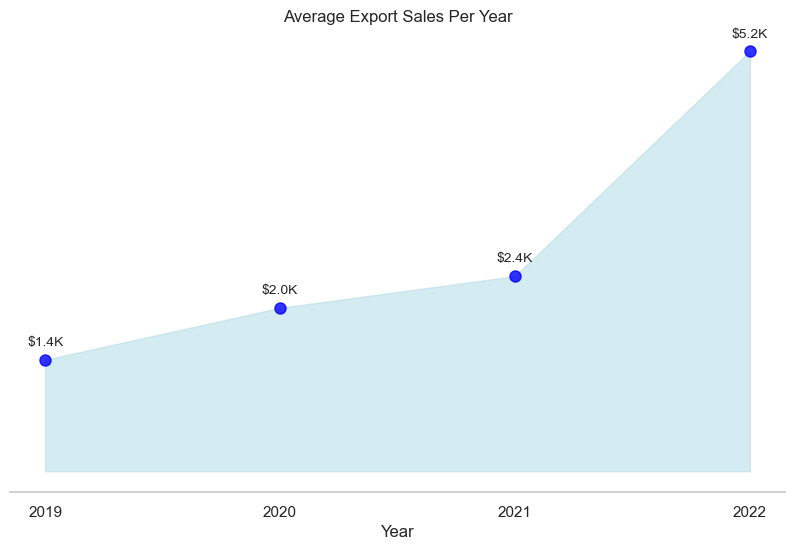

In [60]:
#Average export sales per Year

# Group by 'Year' column and calculate the average sales for each year
average_sales_per_year = df.groupby('Year')['Sales'].mean().reset_index()

# arrange data
years = average_sales_per_year['Year']
sales = average_sales_per_year['Sales']

# Convert sales to K notation
sales_k = [f"${val/1000:.1f}K" for val in sales]

# Plot the transparent area chart with light yellow color
plt.figure(figsize=(10, 6))
plt.fill_between(years, sales, color='lightblue', alpha=0.5)
plt.plot(years, sales, color='blue', alpha=0.8, linewidth=0, marker='o', markersize=8)

# Display the values on each point
for i, txt in enumerate(sales_k):
    plt.annotate(txt, (years[i], sales[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Sales ($)')
plt.title('Average Export Sales Per Year')

# Set x-axis ticks to specific years
plt.xticks(years)

# Remove y-axis
plt.gca().yaxis.set_visible(False)

# Remove y-axis grid lines
plt.gca().yaxis.grid(False)

# Remove right y-axis and top x-axis lines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)

# Display the area chart
plt.show()


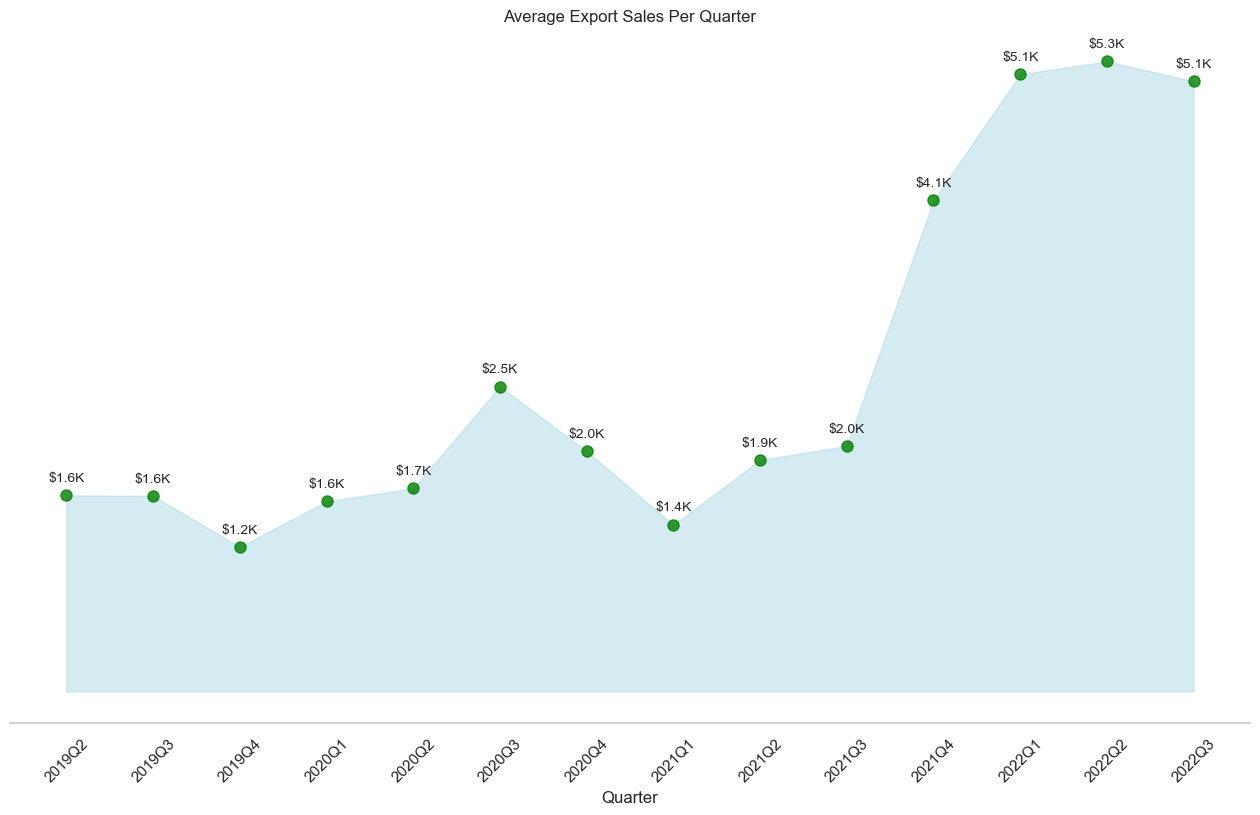

In [61]:
#Average export sales per Quater

# copy df
df_copy = df.copy()

# Convert 'Quarter' to string
df_copy['Quarter'] = df_copy['Quarter'].astype(str)

# Sort the DataFrame by 'Quarter' in ascending order
df_copy = df_copy.sort_values('Quarter')

# Group by 'Quarter' and calculate the average sales for each quarter
quarterly_average_sales = df_copy.groupby('Quarter')['Sales'].mean().reset_index()

# Arrange data
quarters = quarterly_average_sales['Quarter']
sales = quarterly_average_sales['Sales']

# Convert sales to K notation
sales_k = [f"${val/1000:.1f}K" for val in sales]

# Plot the transparent area chart with light yellow color
plt.figure(figsize=(16, 9))
plt.fill_between(quarters, sales, color='lightblue', alpha=0.5)
plt.plot(quarters, sales, color='green', alpha=0.8, linewidth=0, marker='o', markersize=8)

# Display the values on each point
for i, txt in enumerate(sales_k):
    plt.annotate(txt, (quarters[i], sales[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

# Adding labels and title
plt.xlabel('Quarter')
plt.title('Average Export Sales Per Quarter')

# Remove y-axis
plt.gca().yaxis.set_visible(False)

# Remove y-axis grid lines
plt.gca().yaxis.grid(False)

# Remove right y-axis and top x-axis lines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().xaxis.grid(False)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the area chart
plt.show()


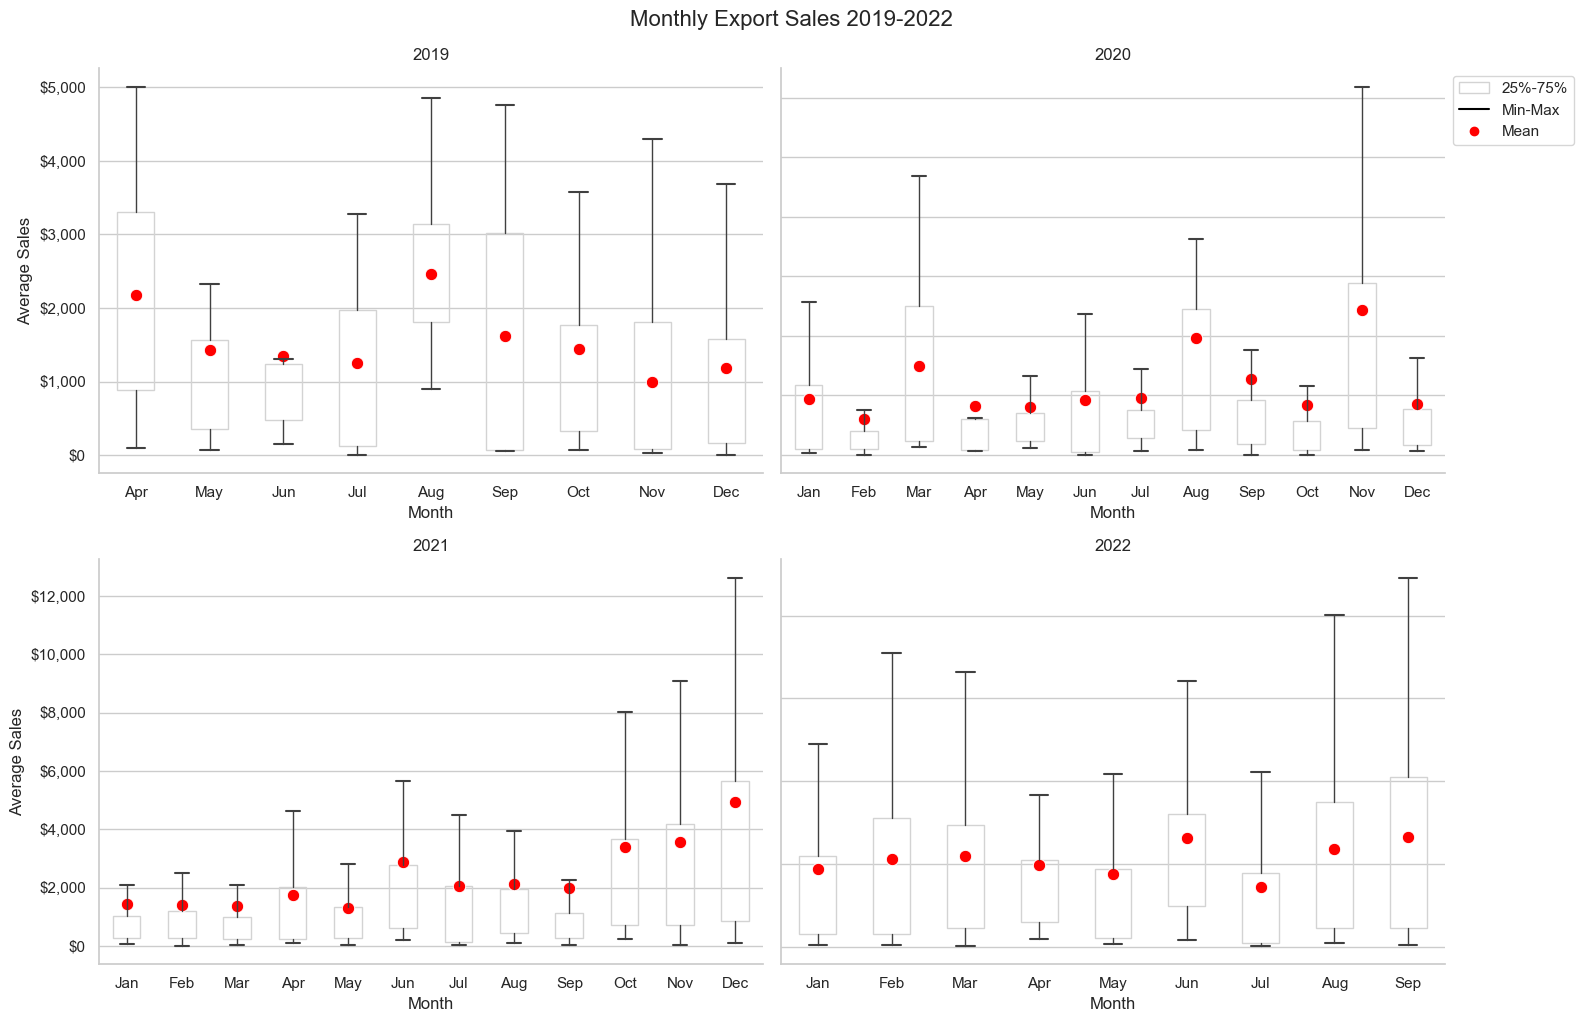

In [62]:
#Yearly Evaluation
#Monthly Export Sales per Year

from matplotlib.ticker import FuncFormatter
import matplotlib.patches as patches

# Define a function to format y-axis tick labels with a dollar sign
def dollar_formatter(x, _):
    return f'${x:,.0f}'

# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Iterate over years
for i, year in enumerate([2019, 2020, 2021, 2022]):
    # Filter data for the specific year
    df_year = df[df['Year'] == year].copy()

    # Extract the month and month name from the 'Date' column
    df_year['Month_Name'] = df_year['Date_Time'].dt.strftime('%b')

    # Sort the DataFrame by the custom order of months
    df_year['Month_Name'] = pd.Categorical(df_year['Month_Name'], categories=month_order, ordered=True)
    df_year = df_year.sort_values('Month_Name')

    # Create a box plot using seaborn with adjusted box and whisker size
    ax = axes[i // 2, i % 2]
    boxprops = dict(facecolor='none', edgecolor='lightgray', linewidth=1)
    whiskerprops = dict(linewidth=1)
    medianprops = dict(linestyle='None', linewidth=0)  # Remove default median line
    boxplot_dict = sns.boxplot(x='Month_Name', y='Sales', data=df_year, showfliers=False, palette=sns.color_palette("husl", 12), boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, width=0.5, ax=ax)

    # Add red dots for the mean
    stats = df_year.groupby('Month_Name')['Sales'].describe()
    sns.scatterplot(x=stats.index, y=stats['mean'], color='red', marker='o', s=80, label='Mean', ax=ax)

    # Adding labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales')
    ax.set_title(f'{year}')

    # Add squares to represent boxes
    legend_patches = [
        patches.Patch(facecolor='none', edgecolor='lightgray', label='25%-75%'),
        plt.Line2D([0], [0], marker='', color='black', linestyle='-', label='Min-Max'),
        plt.Line2D([0], [0], marker='o', color='red', linestyle='', label='Mean')
    ]

    # Display the legend only for the year 2020
    if year == 2020:
        ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))
    else:
        # Remove legend for other years
        ax.legend().set_visible(False)

    # Set y-axis title for the leftmost subplots in each row
    if i % 2 == 0:
        ax.set_ylabel('Average Sales')
        # Format y-axis tick labels with a dollar sign
        ax.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))
    else:
        # Remove y-axis labels for other subplots
        ax.set_ylabel('')
        ax.set_yticklabels([])
    
    # Remove right y-axis and top x-axis lines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

# Adjust layout
plt.tight_layout()

# Add figure title
plt.suptitle('Monthly Export Sales 2019-2022', fontsize=16, y=1.02)

plt.savefig('Monthly_Export_Sales_per_Year.png', dpi=300)

# Display the plot
plt.show()


# OBJECTIVE 3: EXPORT SALES PERFORMANCE AND POTTENTIALS ANALYSIS 
            PURPOSE: To Assess the potential for export sales growth and analyze product performance 

In [63]:
#Product perfomenace Analysis 2019 - 2022

#Percentage Change (PC)
# Create PC_df with necessary columns
PC_df = df.groupby(['Product Code', 'Category']).agg(
    Average_Export_Sales=('Sales', 'mean'),
    New_Value=('Sales', 'last'),  # Use 'last' to get the most recent value
    Old_Value=('Sales', 'first'),  # Use 'first' to get the initial value
    Total_Quantity=('Quantity', 'sum')
).reset_index()

# Calculate percentage change
PC_df['Difference'] = PC_df['New_Value'] - PC_df['Old_Value']

# Handle division by zero
mask = PC_df['Old_Value'] != 0
PC_df.loc[mask, 'Relative_Change'] = PC_df['Difference'] / PC_df['Old_Value']
PC_df.loc[~mask, 'Relative_Change'] = 0  # Set to 0 for cases where Old_Value is 0

# Multiply 'Relative_Change' by 100 to get 'Percentage_Change'
PC_df['Percentage_Change'] = PC_df['Relative_Change'] * 100

# Replace NaN values with 0 in 'Percentage_Change' column
PC_df['Percentage_Change'].fillna(0, inplace=True)

# Convert 'Percentage_Change' column to numeric format
PC_df['Percentage_Change'] = pd.to_numeric(PC_df['Percentage_Change'], errors='coerce')

# Group by 'Category' and sum 'Total_Quantity_Sold' and 'Average_Export_Sales' in PC_df
category_summary = PC_df.groupby('Category').agg(
    Total_Quantity=('Total_Quantity', 'sum'),
    Average_Export_Sales=('Average_Export_Sales', 'mean'),
    Percentage_Change=('Percentage_Change', 'sum')
).reset_index()

# Calculate the percentage change for each category divided by the sum of percentage changes for all categories
category_summary['Percentage_Change'] = (category_summary['Percentage_Change'] /
                                         category_summary['Percentage_Change'].sum()) * 100

# Check the data type of 'Percentage_Change' column
if category_summary['Percentage_Change'].dtype == 'object':
    # Convert 'Percentage_Change' column to numeric format
    category_summary['Percentage_Change'] = pd.to_numeric(category_summary['Percentage_Change'].str.rstrip('%'), errors='coerce')

# Round the numeric values to two decimal places
category_summary['Percentage_Change'] = category_summary['Percentage_Change'].round(2)

# Sort 'Percentage_Change' column in ascending order
category_summary.sort_values(by='Percentage_Change', inplace=True)

# Replace NaN values with 0 in 'Percentage_Change' column
category_summary['Percentage_Change'].fillna(0, inplace=True)

# Format 'Percentage_Change' column as a string without dollar sign
category_summary['Percentage_Change'] = category_summary['Percentage_Change'].apply(lambda x: f'{x:.2f}')

# Add 'Performance_Category' column to category_summary directly based on Percentage_Change
category_summary['Performance_Category'] = pd.cut(
    category_summary['Percentage_Change'].astype(float),  # Convert to float for comparison
    bins=[-float('inf'), 1, 19, 49, 100],
    labels=['Non Performing', 'Low Performing', 'Performing', 'High Performing']
)
# Print the DataFrame
print("Product Performance Analysis 2019 - 2022:")
print(category_summary.to_string(index=False))

Product Performance Analysis 2019 - 2022:
  Category  Total_Quantity  Average_Export_Sales Percentage_Change Performance_Category
 Category3           13000           1057.150909              0.02       Non Performing
Category10             220           1535.375000              0.04       Non Performing
 Category9            7406           3187.972897              0.19       Non Performing
 Category5          115026           2136.256790              0.21       Non Performing
 Category1             846            690.520083              2.22       Low Performing
 Category8          218008           2517.280667              2.56       Low Performing
 Category6            6315            602.329547              2.88       Low Performing
 Category2          249181           2657.772031              7.32       Low Performing
 Category7         1570475           5995.395091             27.87           Performing
 Category4          416425           1611.844645             56.69      High P

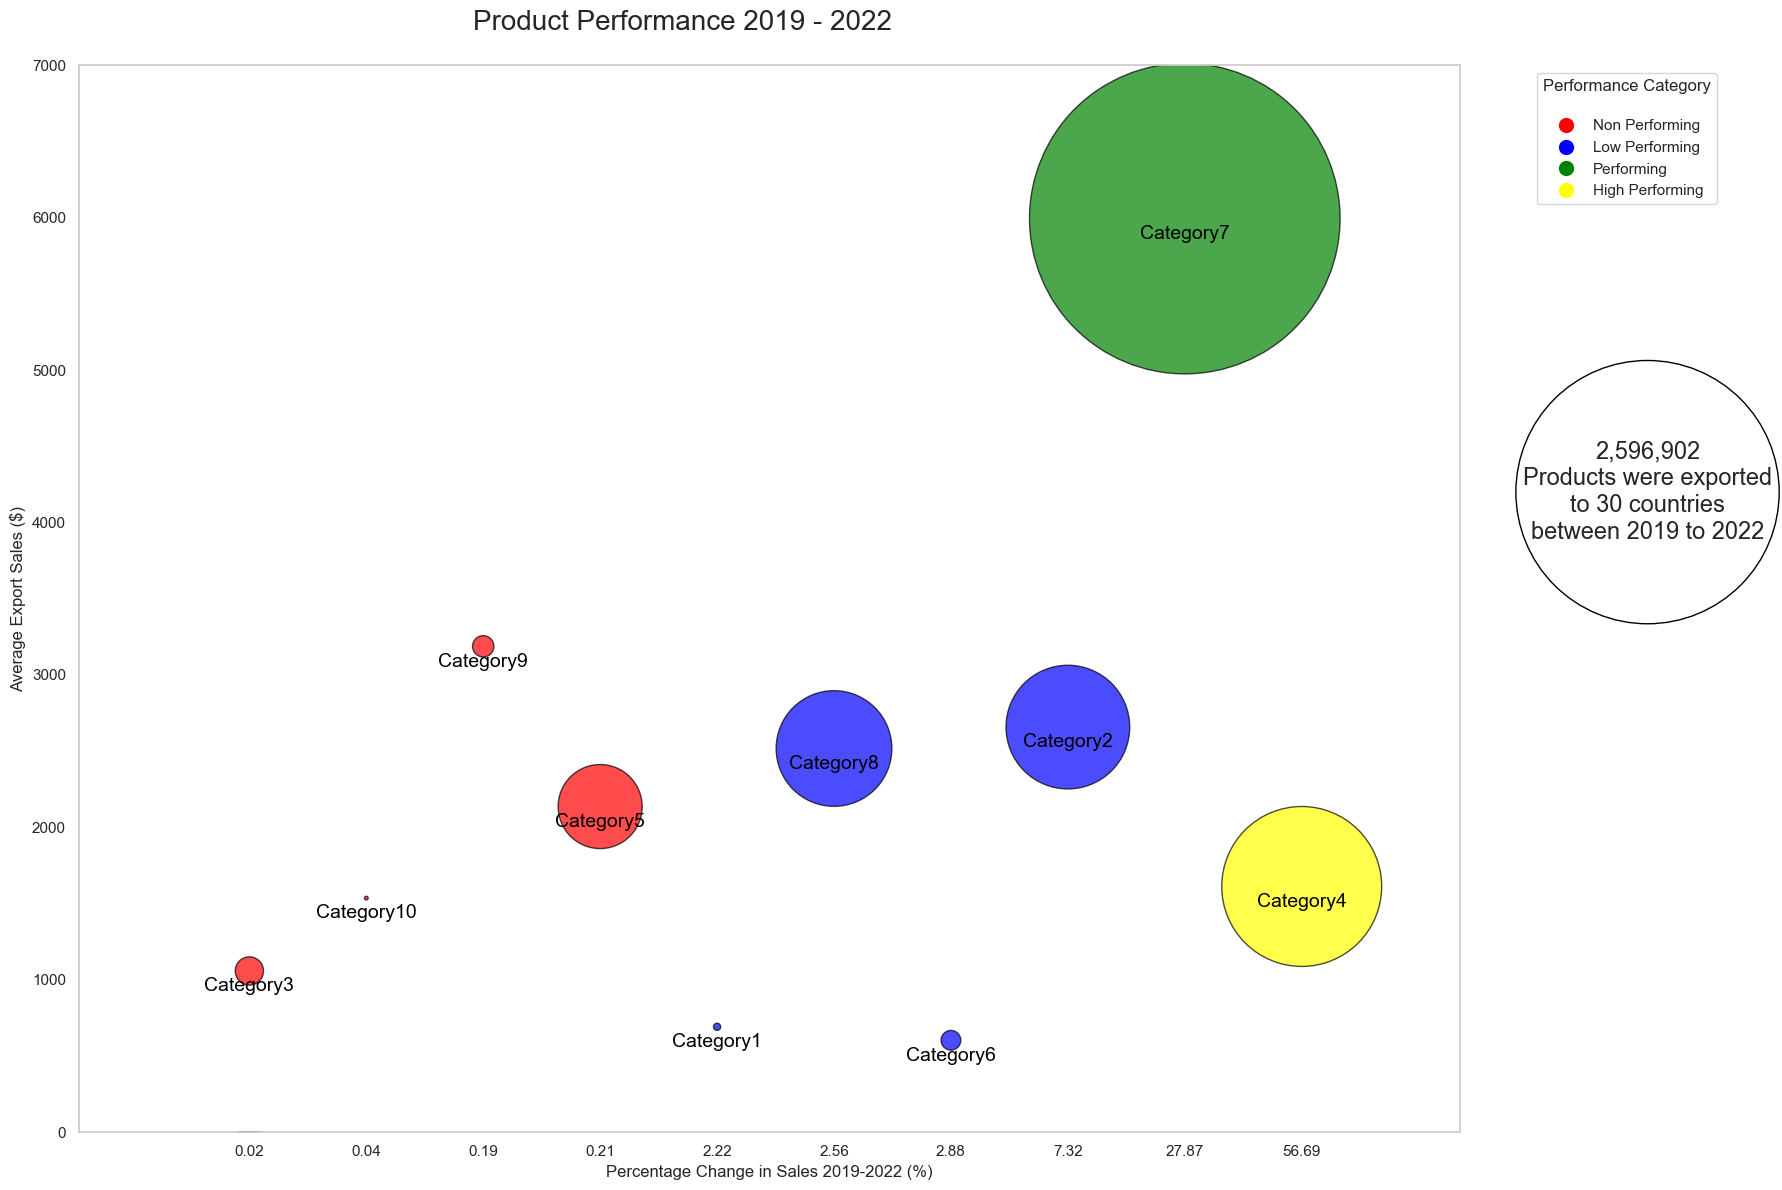

In [64]:
#Plot a Bubble chart for Product performance Analysis 2019 - 2022

# Set the style of the plot using Seaborn
sns.set(style="whitegrid")

# Normalize bubble sizes
max_size = category_summary['Total_Quantity'].max()
normalized_sizes = category_summary['Total_Quantity'] / max_size

# Create a dictionary to map performance categories to colors
performance_colors = {
    'Non Performing': 'red',
    'Low Performing': 'blue',
    'Performing': 'green',
    'High Performing': 'yellow'
}

# Create the bubble chart
fig, ax = plt.subplots(figsize=(18, 12))
scatter = ax.scatter(
    x=category_summary['Percentage_Change'],
    y=category_summary['Average_Export_Sales'],
    s=normalized_sizes * 50000,  # Scale the sizes for better visibility
    c=category_summary['Performance_Category'].map(performance_colors),  # Color based on 'Performance_Category'
    alpha=0.7,  # Transparency
    edgecolors="black",  # Edge color of bubbles (changed to black)
)

# Add labels below each point
for i, label in enumerate(category_summary['Category']):
    ax.annotate(label, (category_summary['Percentage_Change'].iloc[i], category_summary['Average_Export_Sales'].iloc[i] - 100),
                 ha='center', va='center', fontsize=14, color='black')

# Add labels and title
ax.set_xlabel("Percentage Change in Sales 2019-2022 (%)")
ax.set_ylabel("Average Export Sales ($)")  # Include dollar sign in y-axis label
ax.set_title("")

# Add legend for performance category
legend_labels = category_summary['Performance_Category'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=performance_colors[label], markersize=12,
                             label=label) for label in legend_labels]
ax.legend(handles=legend_handles, title='Performance Category\n', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a circle for total quantity
circle = plt.Circle((0, 0), 0.1, color='white', ec='black', fill=True)
ax.add_patch(circle)

# Set y-axis limit to 8000
ax.set_ylim(0, 7000)

# Get current axis limits
x_min, x_max, y_min, y_max = ax.axis()

# Set buffer space for axes limits
buffer_space = 0.9

# Set new limits for x and y axes
ax.set_xlim(x_min - buffer_space, x_max + buffer_space)
ax.set_ylim(y_min - buffer_space, y_max + buffer_space)

# Calculate dynamic position for total quantity text (lower right)
text_x = x_max + (x_max - x_min) * 0.25  # Adjust the factor as needed
text_y = y_min + (y_max - y_min) * 0.60  # Adjust the factor as needed

# Add total quantity text with center alignment
total_quantity_value = int(category_summary["Total_Quantity"].sum())
total_quantity_text = f'{total_quantity_value:,}\nProducts were exported\nto 30 countries\nbetween 2019 to 2022'
ax.text(text_x, text_y, total_quantity_text, fontsize=17, ha='center', va='center', bbox=dict(boxstyle='circle', facecolor='white', edgecolor='black'))

# Remove gridlines
ax.grid(False)

# Add figure title
plt.suptitle('Product Performance 2019 - 2022', fontsize=20, ha='right', y=0.99)

# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()


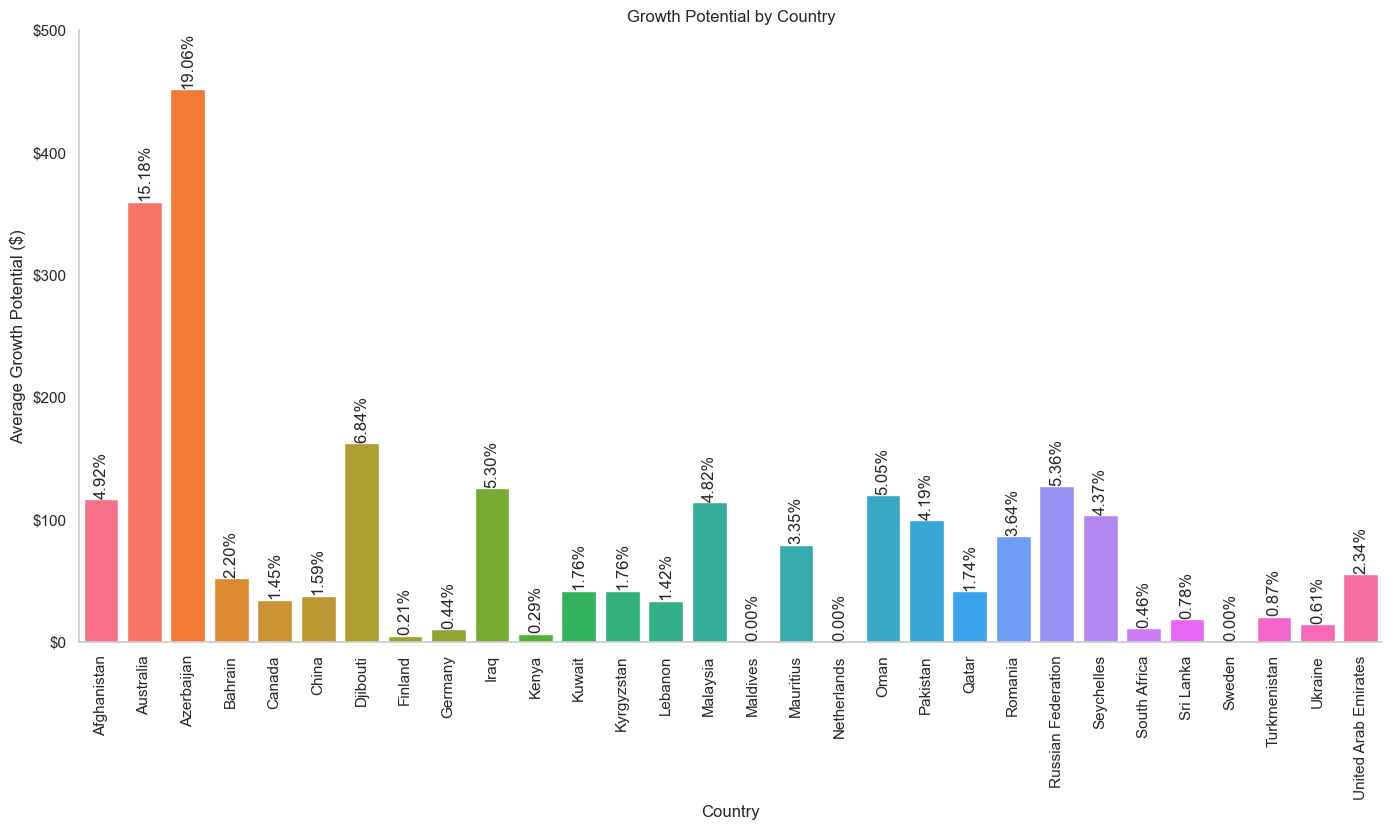

In [65]:
#Coutry pottential Growth Analysis (GP) based on 2019 - 2022 Sales

# Create a data frame of Country and Date
GP_df = df.sort_values(by=['Country', 'Date_Time'])  # Sort by Country names and date

# Calculate growth potential (percentage change) for each Country
GP_df['Growth Potential'] = df.groupby('Country')['Sales'].pct_change() * 100

# Fill NaN values with 0 in the 'Growth Potential' column
GP_df['Growth Potential'] = GP_df['Growth Potential'].fillna(0)

# Calculate the average growth potential for each unique destination
Country_growth = GP_df.groupby('Country')['Growth Potential'].mean().fillna(0).reset_index()

# Convert 'Growth Potential' to numeric
Country_growth['Growth Potential'] = pd.to_numeric(Country_growth['Growth Potential'], errors='coerce').fillna(0)

# Calculate the total growth potential for each unique destination
total_growth = Country_growth['Growth Potential'].sum()

# Calculate the percentage of growth potential for each country
Country_growth['Percentage Growth Potential'] = (Country_growth['Growth Potential'] / total_growth) * 100

# Format the percentage column in the average growth potential DataFrame
Country_growth['Percentage Growth Potential'] = Country_growth['Percentage Growth Potential'].map("{:.2f}%".format)

# Use Seaborn's default color palette
colors = sns.color_palette('husl', n_colors=len(Country_growth))

# Create a bar chart
plt.figure(figsize=(14, 10))
bars = plt.bar(Country_growth['Country'], Country_growth['Growth Potential'], color=colors)
plt.xlabel('Country')
plt.ylabel('Average Growth Potential ($)')
plt.title('Growth Potential by Country')
plt.xticks(rotation=90)

# Set x-axis limits to start from 0
plt.xlim(-0.5, len(Country_growth))

# Set x-axis limits with padding to the left
plt.xlim(-0.5, len(Country_growth) - 0.5)

# Set y-axis range and format without decimal places
plt.ylim(0, 500)

plt.tight_layout()

# Display percentage on the bars
for i, value in enumerate(Country_growth['Percentage Growth Potential']):
    plt.text(i, Country_growth['Growth Potential'][i] + 0.5, value, ha='center', va='bottom', rotation=90)

# Format y-axis with dollar signs
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: "${:,.0f}".format(x)))

# Remove right y-axis and top x-axis lines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)

# Adjust layout to prevent labels from getting cut off
plt.subplots_adjust(bottom=0.35)

plt.show()


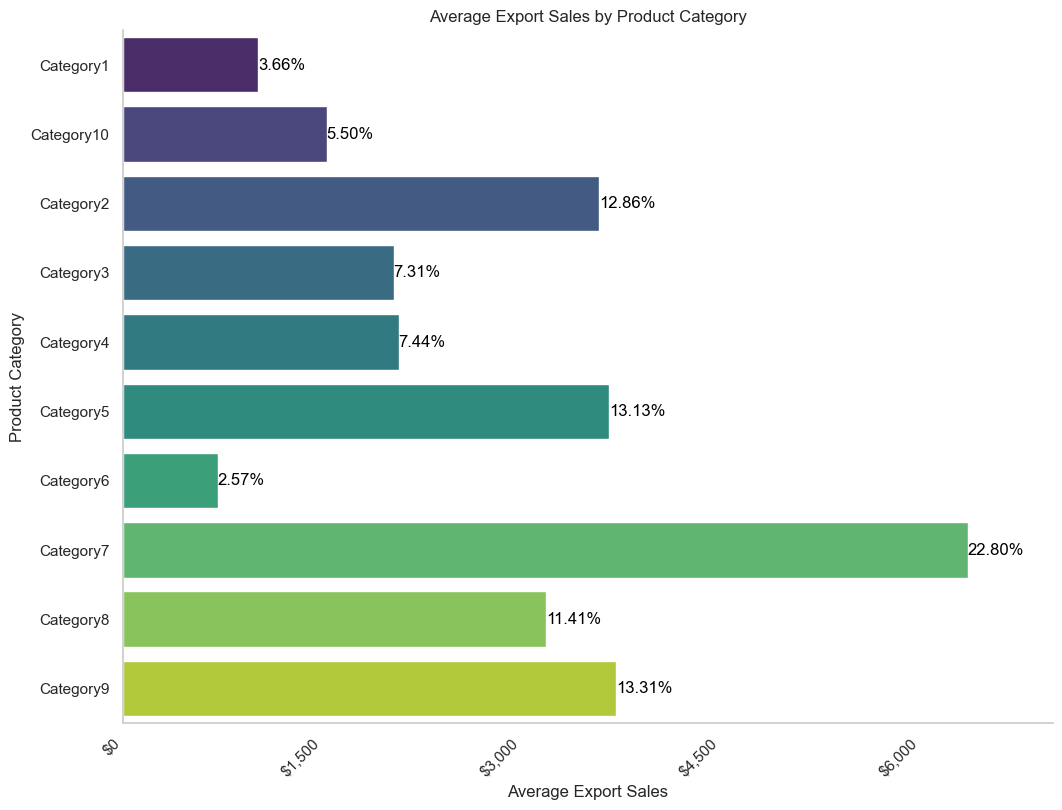

In [66]:
#Average Export Sales by Category

#Group by Category and Average sales
Average_sales_by_category = df.groupby('Category')['Sales'].mean().reset_index()

# Calculate the percentage of Average sales for each category
Average_sales_by_category['Percentage'] = (Average_sales_by_category['Sales'] / Average_sales_by_category['Sales'].sum()) * 100

# Plotting the bar chart with percentage labels
plt.figure(figsize=(12, 9))
bar_plot = sns.barplot(x='Sales', y='Category', data=Average_sales_by_category, palette='viridis')

# Add percentage labels on top of each bar
for index, value in enumerate(Average_sales_by_category['Sales']):
    percentage = Average_sales_by_category.loc[index, 'Percentage']
    bar_plot.text(value, index, f'{percentage:.2f}%', va='center', ha='left', color='black')

plt.title('Average Export Sales by Product Category')
plt.xlabel('Average Export Sales')
plt.ylabel('Product Category')

# Format x-axis ticks as integers
plt.xticks(rotation=45, ha='right')
plt.gca().get_xaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: "${:,.0f}".format(x)))

# Set y-axis range
plt.xlim(0, 7000)
plt.xticks(range(0, 7000, 1500))

# Remove right y-axis and top x-axis lines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)

plt.show()


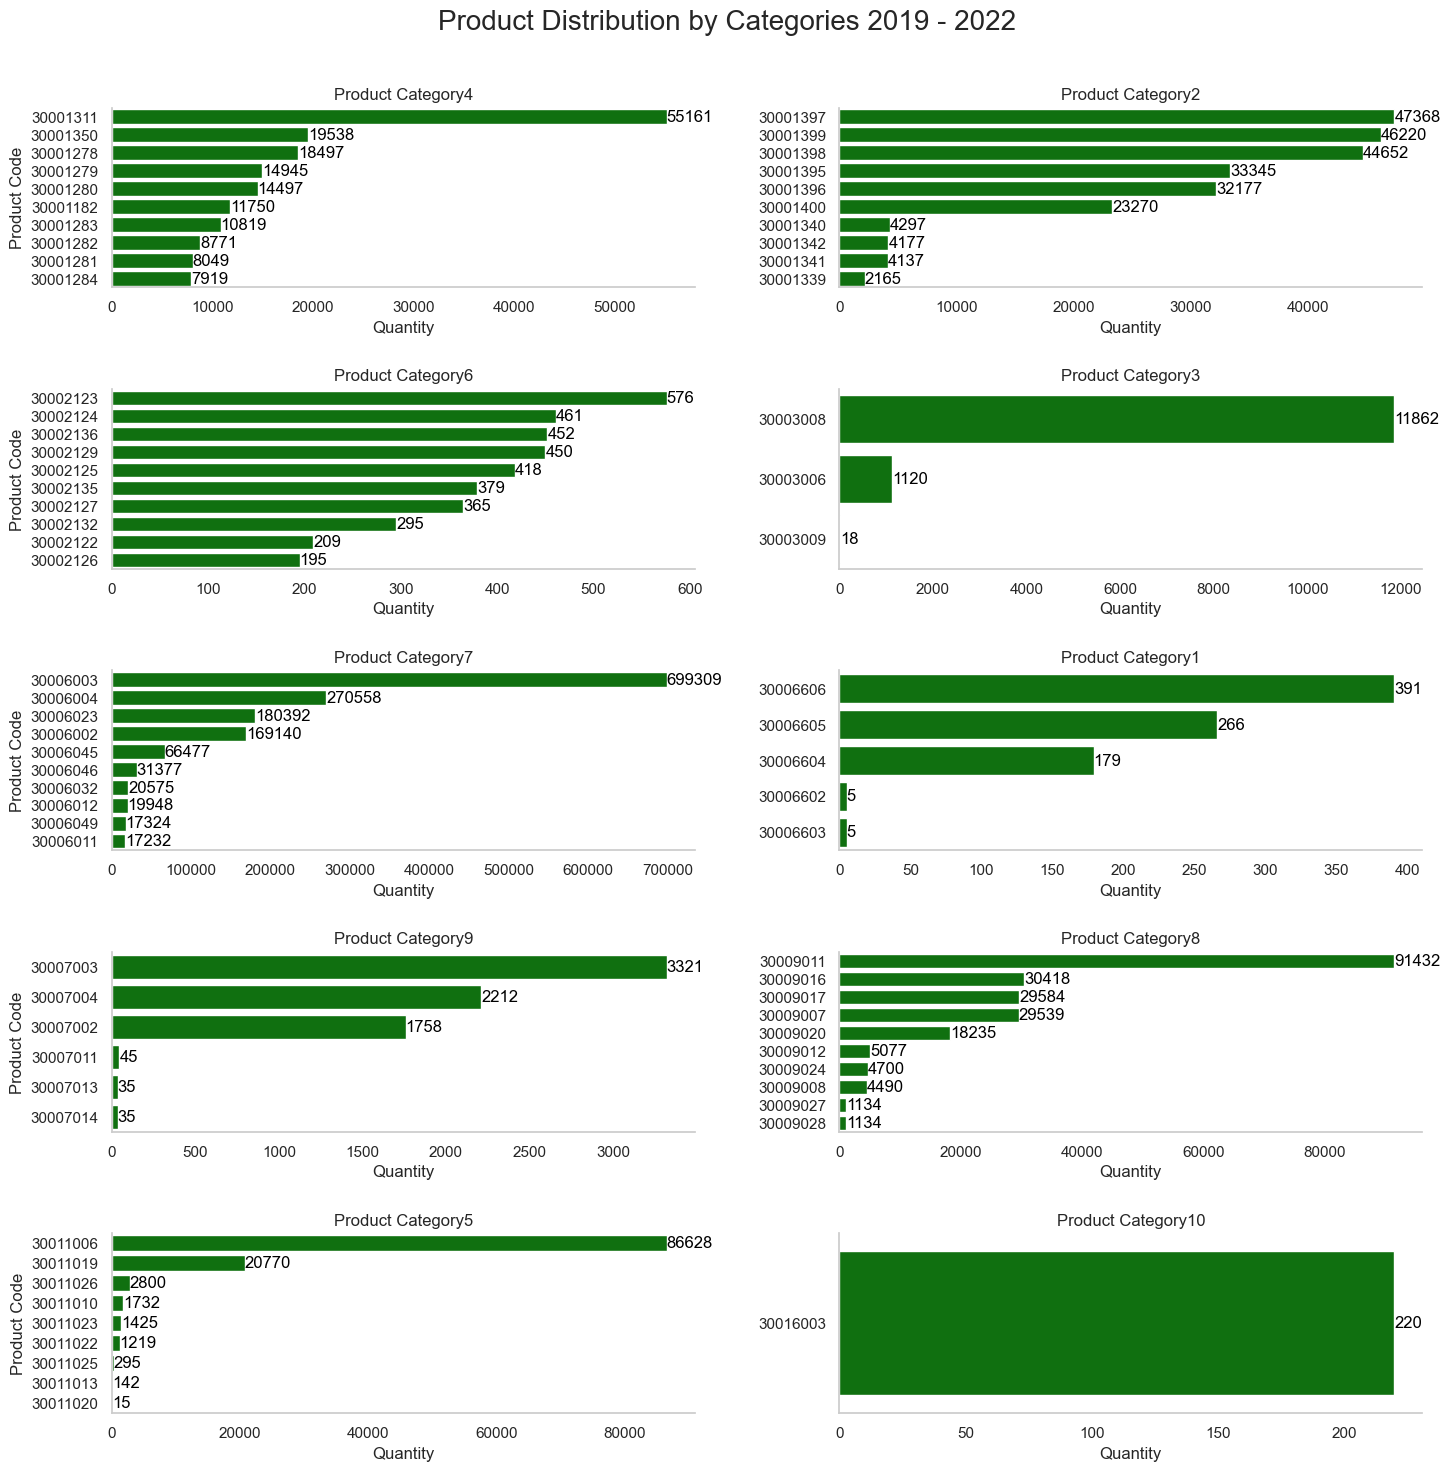

In [67]:
# Product Quantity Distribution in Categories

# Create a new DataFrame with the sum of quantities for each Product Code and Category
Distribution_by_Product_code = df.groupby(['Product Code', 'Category'], as_index=False)['Quantity'].sum().copy()

# Replace NaN values with 0
Distribution_by_Product_code['Quantity'].fillna(0, inplace=True)

# Convert Product Code to string
Distribution_by_Product_code['Product Code'] = Distribution_by_Product_code['Product Code'].astype(str)

# Convert Quantity to integer
Distribution_by_Product_code['Quantity'] = Distribution_by_Product_code['Quantity'].astype(int)

# Get unique categories
unique_categories = Distribution_by_Product_code['Category'].unique()

# Determine the number of rows needed
num_rows = (len(unique_categories) + 1) // 2  # Add 1 to round up in case of an odd number of categories

# Specify the desired bar width
bar_width = 0.5  # Adjust this value based on your preference

# Create subplots dynamically
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 3 * num_rows))

# Add figure title
plt.suptitle('Product Distribution by Categories 2019 - 2022', fontsize=20, ha='center', y=0.99)

# Display the bar charts in subplots with values inside the bars
for i, category in enumerate(unique_categories):
    row, col = divmod(i, 2)

    # Filter data for the current category and create a copy
    category_data = Distribution_by_Product_code[Distribution_by_Product_code['Category'] == category].copy()

    # Sort data by quantity in descending order
    category_data = category_data.sort_values(by='Quantity', ascending=False)

    # Select top Products
    top_products = category_data.head(10)

    # Plot the data
    sns.barplot(x='Quantity', y='Product Code', data=top_products, color='Green', ax=axes[row, col])

    axes[row, col].set_title(f"Product {category}")
    axes[row, col].set_xlabel('Quantity')
    
    # Set y-axis label only for the leftmost column in each row
    axes[row, col].set_ylabel('Product Code' if col == 0 else '')

    # Display values inside the bars
    for index, value in enumerate(top_products['Quantity']):
        axes[row, col].text(value, index, f'{value}', va='center', ha='left', color='black')
    
    # Remove right y-axis and top x-axis lines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)
    axes[row, col].xaxis.grid(False)
    axes[row, col].yaxis.grid(False)

# Adjust layout with custom parameters
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0, rect=[0, 0, 1, 1])
plt.show()

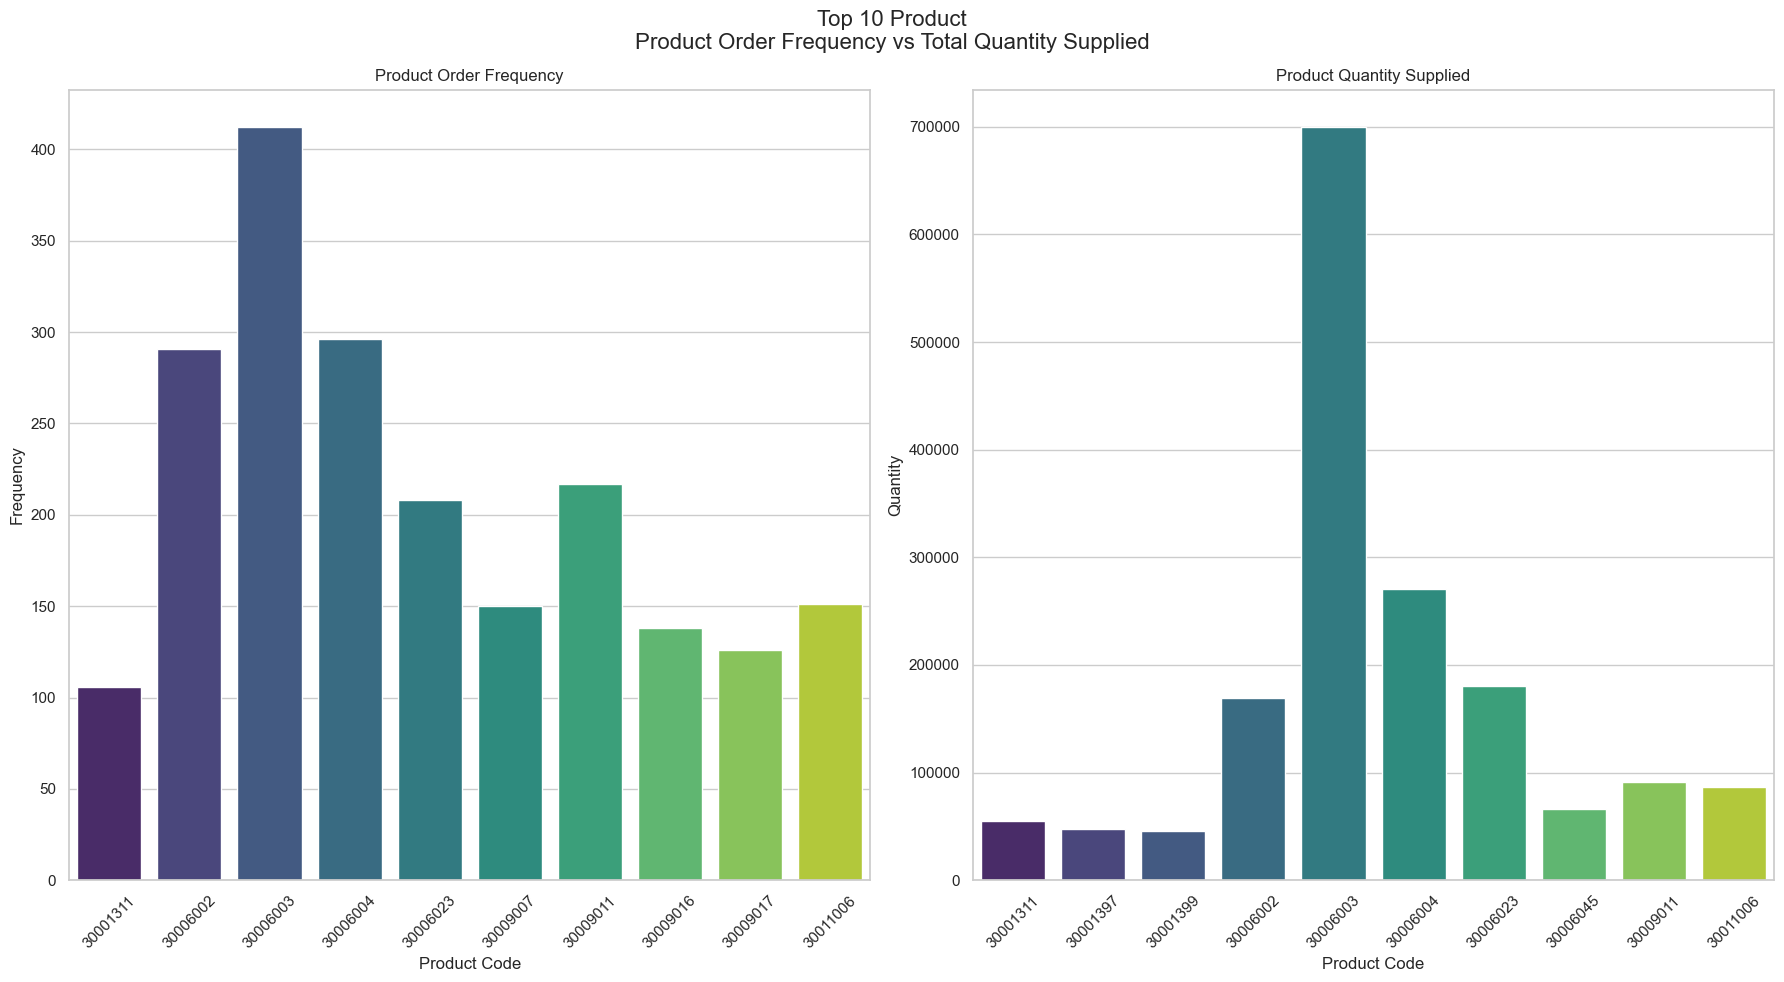

In [68]:
#Top 10 Product
#Order Frequecy vs Quantity Supplied

# Count occurrences of each Product code
product_code_counts = df['Product Code'].value_counts()

# Select the top 10 Product codes by order frequency
top_product_codes = product_code_counts.head(10)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Create a bar plot for order frequency
sns.barplot(x=top_product_codes.index, y=top_product_codes.values, palette='viridis', ax=ax1)
ax1.set_xlabel('Product Code')
ax1.set_ylabel('Frequency')
ax1.set_title('Product Order Frequency')

# Rotate x-axis labels by 45 degrees
ax1.tick_params(axis='x', rotation=45)

# Convert 'Quantity' to numeric format, handling errors
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Create a DataFrame to calculate total quantity per Product code
total_quantity_df = df.groupby('Product Code')['Quantity'].sum().reset_index()

# Drop rows with NaN (missing) values in 'Quantity'
total_quantity_df = total_quantity_df.dropna(subset=['Quantity'])

# Select the top 10 Product codes by total quantity
top_total_quantity = total_quantity_df.nlargest(10, 'Quantity')

# Create a bar plot for total quantity
sns.barplot(x=top_total_quantity['Product Code'], y=top_total_quantity['Quantity'], palette='viridis', ax=ax2)
ax2.set_xlabel('Product Code')
ax2.set_ylabel('Quantity')
ax2.set_title('Product Quantity Supplied')

# Rotate x-axis labels by 45 degrees
ax2.tick_params(axis='x', rotation=45)

# Set the overall subplot title
fig.suptitle('Top 10 Product\nProduct Order Frequency vs Total Quantity Supplied', fontsize=16)

plt.tight_layout()
plt.show()


# OBJECTIVE 4:  Distributors Performance Review

        Goal: Review distribution performance to optimize strategies and maximize revenue

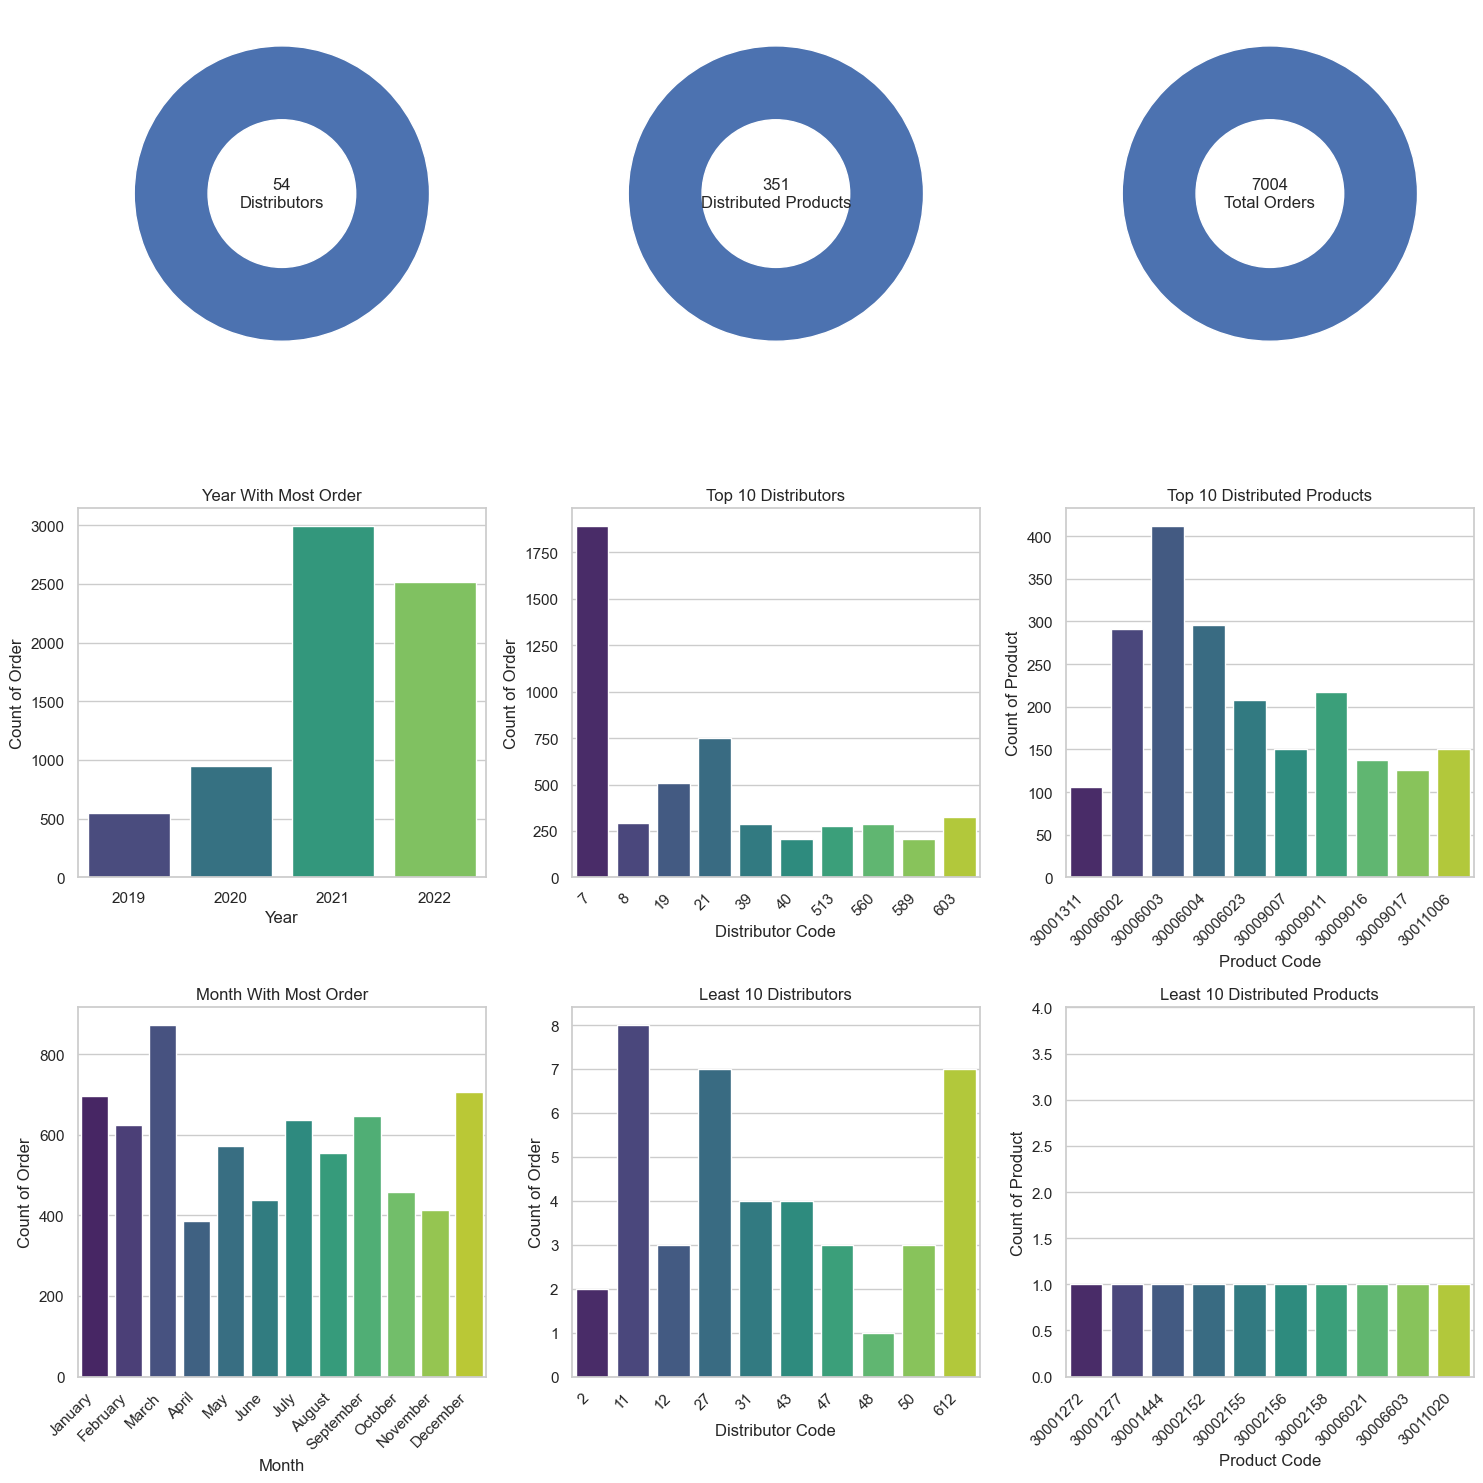

In [69]:
# Total Distributors
total_distributor = df['Customer Code'].nunique() 

# Total orders
total_orders = df['Product ID'].count()

# Product Distributed
total_products = df['Product Code'].nunique() 

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Pie chart for Distributors
axs[0, 0].pie([total_distributor], labels=[''], autopct='', startangle=90, wedgeprops=dict(width=0.5))
axs[0, 0].text(0, 0, f'{total_distributor}\nDistributors', va='center', ha='center', fontsize=12)
axs[0, 0].set_title('')

# Pie chart for total Product Distributed
axs[0, 1].pie([total_products], labels=[''], autopct='', startangle=90, wedgeprops=dict(width=0.5))
axs[0, 1].text(0, 0, f'{total_products}\nDistributed Products', va='center', ha='center', fontsize=12)
axs[0, 1].set_title('')

# Pie chart for total orders
axs[0, 2].pie([total_orders], labels=[''], autopct='', startangle=90, wedgeprops=dict(width=0.5))
axs[0, 2].text(0, 0, f'{total_orders}\nTotal Orders', va='center', ha='center', fontsize=12)
axs[0, 2].set_title('')


# Group by year and count the number of entries for each year
yearly_counts = df['Year'].value_counts().reset_index().rename(columns={'index': 'Year', 'Year': 'Entry_Count'})

# Sort the DataFrame by year
yearly_counts = yearly_counts.sort_values('Year')

# Create a bar plot for yearly entry count
sns.barplot(x='Year', y='Entry_Count', data=yearly_counts, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Count of Order')
axs[1, 0].set_title('Year With Most Order')


# Count occurrences of each customer code
customer_code_counts = df['Customer Code'].value_counts()

# Select the top 10 customer codes
top_customer_codes = customer_code_counts.head(10)

# Create a bar plot for the top 10 customer codes
bar_plot_top_customers = sns.barplot(x=top_customer_codes.index, y=top_customer_codes.values, palette='viridis', ax=axs[1, 1])
bar_plot_top_customers.set_xticklabels(bar_plot_top_customers.get_xticklabels(), rotation=45, ha='right')
axs[1, 1].set_xlabel('Distributor Code')
axs[1, 1].set_ylabel('Count of Order')
axs[1, 1].set_title('Top 10 Distributors')

# Count occurrences of each Product Code
product_code_counts = df['Product Code'].value_counts()
# Select the top 10 Product codes
top_products = product_code_counts.head(10)

# Create a bar plot for the top 10 Product codes
bar_plot_top_products = sns.barplot(x=top_products.index, y=top_products.values, palette='viridis', ax=axs[1, 2])
bar_plot_top_products.set_xticklabels(bar_plot_top_products.get_xticklabels(), rotation=45, ha='right')
axs[1, 2].set_xlabel('Product Code')
axs[1, 2].set_ylabel('Count of Product')
axs[1, 2].set_title('Top 10 Distributed Products')

# Extract the month name from the 'Date' column
df['Month_Name'] = df['Date_Time'].dt.strftime('%B')  # Use '%B' for full month names

# Group by month name and count the number of entries for each month
monthly_counts = df['Month_Name'].value_counts().reset_index().rename(columns={'index': 'Month_Name', 'Month_Name': 'Entry_Count'})

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Sort the DataFrame by the custom order of months
monthly_counts['Month_Name'] = pd.Categorical(monthly_counts['Month_Name'], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values('Month_Name')

# Create a bar plot for monthly entry count
bar_plot_monthly = sns.barplot(x='Month_Name', y='Entry_Count', data=monthly_counts, palette='viridis', ax=axs[2, 0])
bar_plot_monthly.set_xticklabels(bar_plot_monthly.get_xticklabels(), rotation=45, ha='right')
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Count of Order')
axs[2, 0].set_title('Month With Most Order')


# Select the bottom 10 customer codes
bottom_customer_codes = customer_code_counts.tail(10)

# Create a bar plot for the bottom 10 customer codes
bar_plot_bottom_customers = sns.barplot(x=bottom_customer_codes.index, y=bottom_customer_codes.values, palette='viridis', ax=axs[2, 1])
bar_plot_bottom_customers.set_xticklabels(bar_plot_bottom_customers.get_xticklabels(), rotation=45, ha='right')
axs[2, 1].set_xlabel('Distributor Code')
axs[2, 1].set_ylabel('Count of Order')
axs[2, 1].set_title('Least 10 Distributors')

# Count occurrences of each Product Code
product_code_counts = df['Product Code'].value_counts()

# Select the bottom 10 Product codes
bottom_products = product_code_counts.tail(10)

# Create a bar plot for the bottom 10 Product codes
bar_plot_bottom_products = sns.barplot(x=bottom_products.index, y=bottom_products.values, palette='viridis', ax=axs[2, 2])
bar_plot_bottom_products.set_xticklabels(bar_plot_bottom_products.get_xticklabels(), rotation=45, ha='right')
axs[2, 2].set_xlabel('Product Code')
axs[2, 2].set_ylabel('Count of Product')
axs[2, 2].set_ylim([0, 4])
axs[2, 2].set_title('Least 10 Distributed Products')


plt.tight_layout()
plt.show()


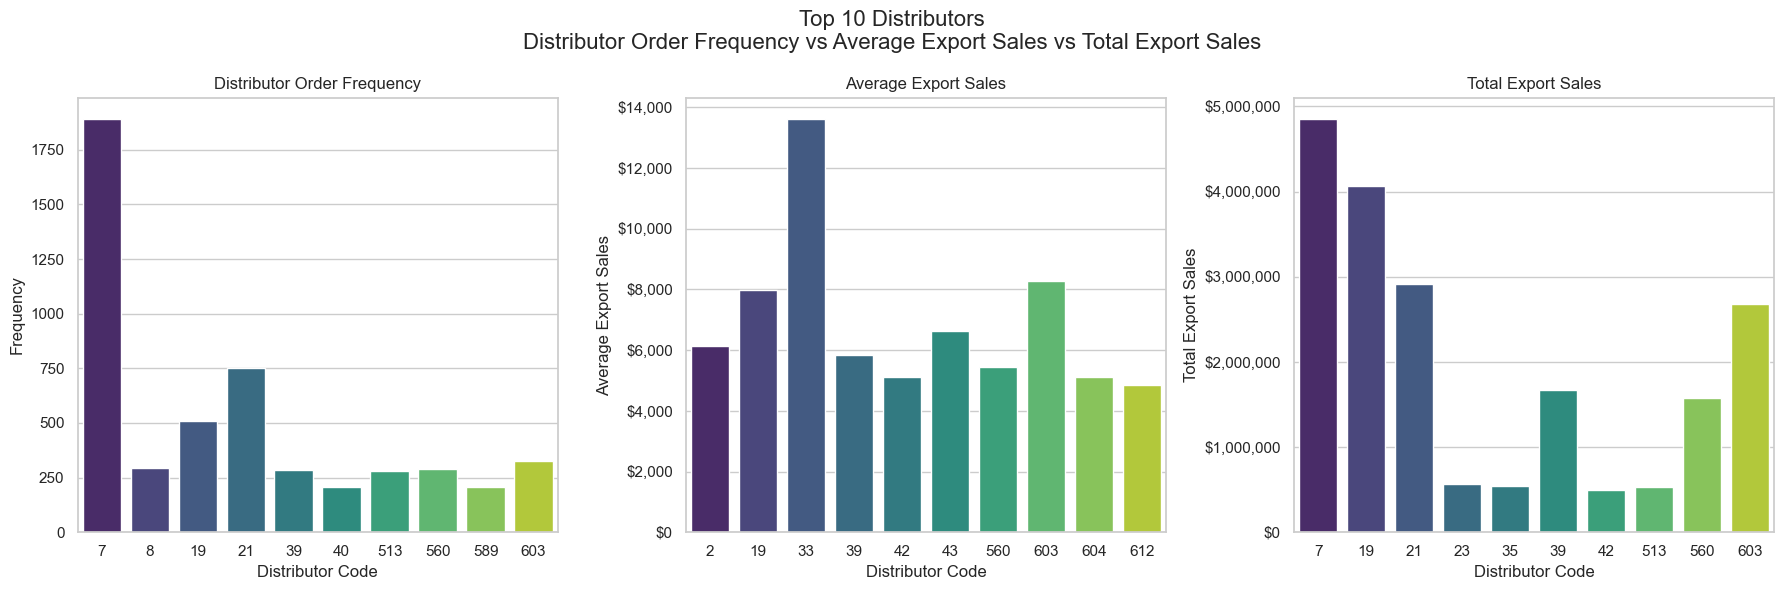

In [70]:
#Top 10 Distributor
#Order Frequecy vs Averge export sales vs Total Export Sales

# Count occurrences of each customer code
customer_code_counts = df['Customer Code'].value_counts()

# Select the top 10 customer codes by order frequency
top_customer_codes = customer_code_counts.head(10)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Order frequency
sns.barplot(x=top_customer_codes.index, y=top_customer_codes.values, palette='viridis', ax=ax1)
ax1.set_xlabel('Distributor Code')
ax1.set_ylabel('Frequency')
ax1.set_title('Distributor Order Frequency')

# Plot 2: Average export sales
average_sales_df = df.groupby('Customer Code')['Sales'].mean().reset_index()
top_average_sales = average_sales_df.nlargest(10, 'Sales')
sns.barplot(x=top_average_sales['Customer Code'], y=top_average_sales['Sales'], palette='viridis', ax=ax2)
ax2.set_xlabel('Distributor Code')
ax2.set_ylabel('Average Export Sales')
ax2.set_title('Average Export Sales')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "${:,.0f}".format(x)))

# Plot 3: Total export sales
total_sales_df = df.groupby('Customer Code')['Sales'].sum().reset_index()
top_total_sales = total_sales_df.nlargest(10, 'Sales')
sns.barplot(x=top_total_sales['Customer Code'], y=top_total_sales['Sales'], palette='viridis', ax=ax3)
ax3.set_xlabel('Distributor Code')
ax3.set_ylabel('Total Export Sales')
ax3.set_title('Total Export Sales')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "${:,.0f}".format(x)))

# Set the overall subplot title
fig.suptitle('Top 10 Distributors\nDistributor Order Frequency vs Average Export Sales vs Total Export Sales', fontsize=16)

plt.tight_layout()

plt.savefig('1Top 10 Distributor Order Frequency vs Average Export Sales.jpeg', dpi=300)

plt.show()


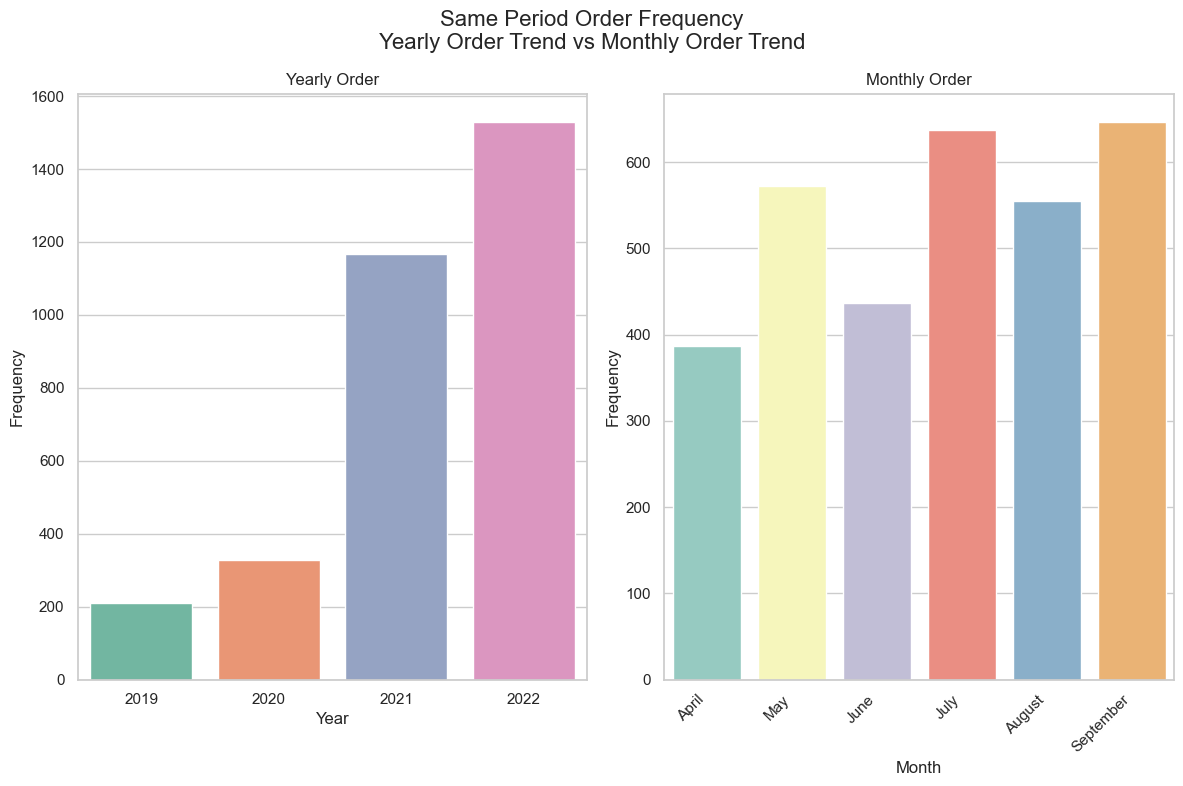

In [71]:
#Same period analysis

# Define custom color palettes for the bar plots
yearly_palette = sns.color_palette("Set2")
monthly_palette = sns.color_palette("Set3")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Filter out specific months
filtered_df = df[~df['Month_Name'].isin(['January', 'February', 'March', 'October', 'November', 'December'])]

# Group by year and count the number of entries for each year
yearly_counts = filtered_df['Year'].value_counts().reset_index().rename(columns={'index': 'Year', 'Year': 'Entry_Count'})

# Sort the DataFrame by year
yearly_counts = yearly_counts.sort_values('Year')

# Create a bar plot for yearly entry count with custom colors
sns.barplot(x='Year', y='Entry_Count', data=yearly_counts, palette=yearly_palette, ax=axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Yearly Order')

# Group by month name and count the number of entries for each month
monthly_counts = filtered_df['Month_Name'].value_counts().reset_index().rename(columns={'index': 'Month_Name', 'Month_Name': 'Entry_Count'})

# Define the order of months
month_order = [
    'April', 'May', 'June', 'July', 'August', 'September'
]

# Sort the DataFrame by the custom order of months
monthly_counts['Month_Name'] = pd.Categorical(monthly_counts['Month_Name'], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values('Month_Name')

# Create a bar plot for monthly entry count with custom colors
bar_plot_monthly = sns.barplot(x='Month_Name', y='Entry_Count', data=monthly_counts, palette=monthly_palette, ax=axs[1])
bar_plot_monthly.set_xticklabels(bar_plot_monthly.get_xticklabels(), rotation=45, ha='right')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Monthly Order')

# Set the overall subplot title
fig.suptitle('Same Period Order Frequency\nYearly Order Trend vs Monthly Order Trend', fontsize=16)

plt.tight_layout()
plt.show()


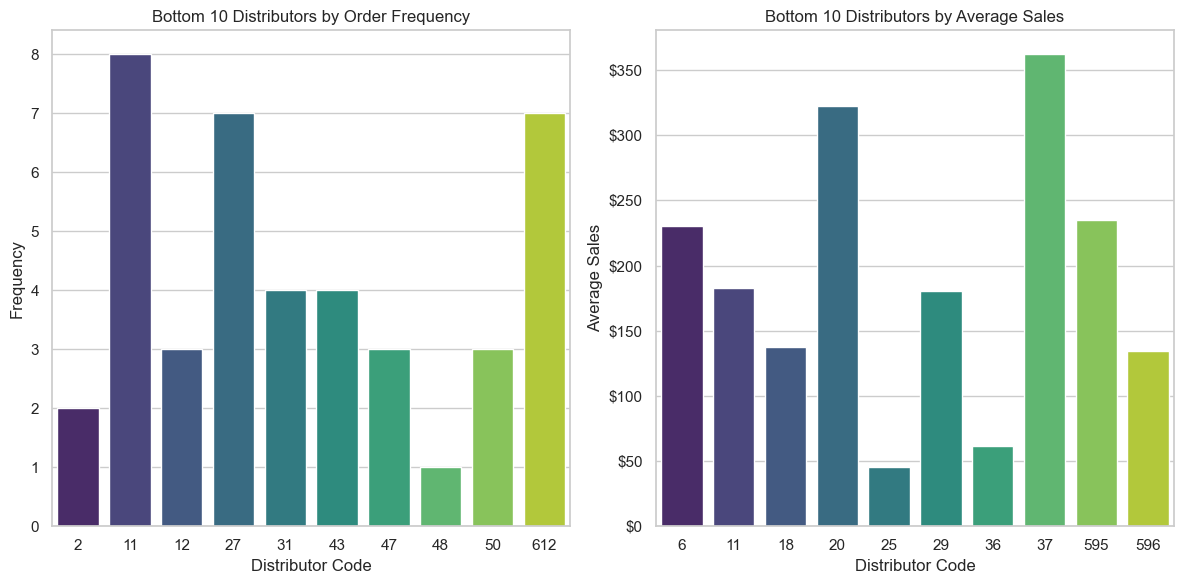

In [72]:
#Bottom 10 Product
#Order Frequecy vs Quantity Supplied

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Count occurrences of each customer code
customer_code_counts = df['Customer Code'].value_counts()

# Select the bottom 10 customer codes by order frequency
bottom_customer_codes = customer_code_counts.tail(10)

# Create a bar plot for order frequency of the bottom 10 distributors
sns.barplot(x=bottom_customer_codes.index, y=bottom_customer_codes.values, palette='viridis', ax=ax1)
ax1.set_xlabel('Distributor Code')
ax1.set_ylabel('Frequency')
ax1.set_title('Bottom 10 Distributors by Order Frequency')

# Create a DataFrame to calculate average sales per distributor
average_sales_df = df.groupby('Customer Code')['Sales'].mean().reset_index()

# Select the bottom 10 customer codes by average sales
bottom_average_sales = average_sales_df.nsmallest(10, 'Sales')

# Create a bar plot for average sales of the bottom 10 distributors
sns.barplot(x=bottom_average_sales['Customer Code'], y=bottom_average_sales['Sales'], palette='viridis', ax=ax2)
ax2.set_xlabel('Distributor Code')
ax2.set_ylabel('Average Sales')
ax2.set_title('Bottom 10 Distributors by Average Sales')

# Format y-axis ticks as integers with dollar signs and commas
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "${:,.0f}".format(x)))

plt.tight_layout()
plt.show()


# OBJECTIVE 5: Factors Impacting Export Sales Performance

    Goal: To identify and analyze key factors influencing export sales performance for strategic decision-making

In [73]:
# Multivariate Analysis  
# Pearson Correlation to show the relationship between Export Variables

# Create MVA dataframe from df

# Aggregate by Date_Time
mva_columns = [
    'No of Product(s)',
    'No of Country(s)',
    'Sum_of_Daily_Quantity',
    'Sum_of_Daily_Price',
    'No of Distributor(s)',
    'Total_Sales'
]
mva = pd.DataFrame(columns=mva_columns)

# Populate MVA DataFrame
mva['Date_Time'] = df['Date_Time'].unique()
mva['No of Product(s)'] = df.groupby('Date_Time')['Product Code'].nunique().loc[mva['Date_Time']].values
mva['No of Country(s)'] = df.groupby('Date_Time')['Country'].nunique().loc[mva['Date_Time']].values
mva['Sum_of_Daily_Quantity'] = df.groupby('Date_Time')['Quantity'].sum().loc[mva['Date_Time']].values
mva['Sum_of_Daily_Price'] = df.groupby('Date_Time')['Price'].sum().loc[mva['Date_Time']].values
mva['No of Distributor(s)'] = df.groupby('Date_Time')['Customer Code'].nunique().loc[mva['Date_Time']].values
mva['Total_Sales'] = df.assign(Sales_Amount=df['Quantity'] * df['Price']).groupby('Date_Time')['Sales_Amount'].sum().loc[mva['Date_Time']].values

In [74]:
#view created mva dataframe
mva.tail(20)

,No of Product(s),No of Country(s),Sum_of_Daily_Quantity,Sum_of_Daily_Price,No of Distributor(s),Total_Sales,Date_Time
320,38,4,11861,936.74,4,237900.65,2022-08-16
321,24,1,6052,317.73,2,67648.47,2022-08-20
322,70,2,16818,2136.79,3,229129.18,2022-08-21
323,16,2,4007,199.50,2,66370.48,2022-08-22
324,4,1,8000,37.52,1,75040.00,2022-08-23
325,2,1,3450,19.86,1,34258.50,2022-08-24
326,14,1,8922,182.93,3,120526.14,2022-08-27
327,6,2,15816,124.87,3,160515.70,2022-08-28
328,3,1,3400,30.75,1,34850.00,2022-08-29
329,7,1,14850,79.13,3,146220.50,2022-08-30


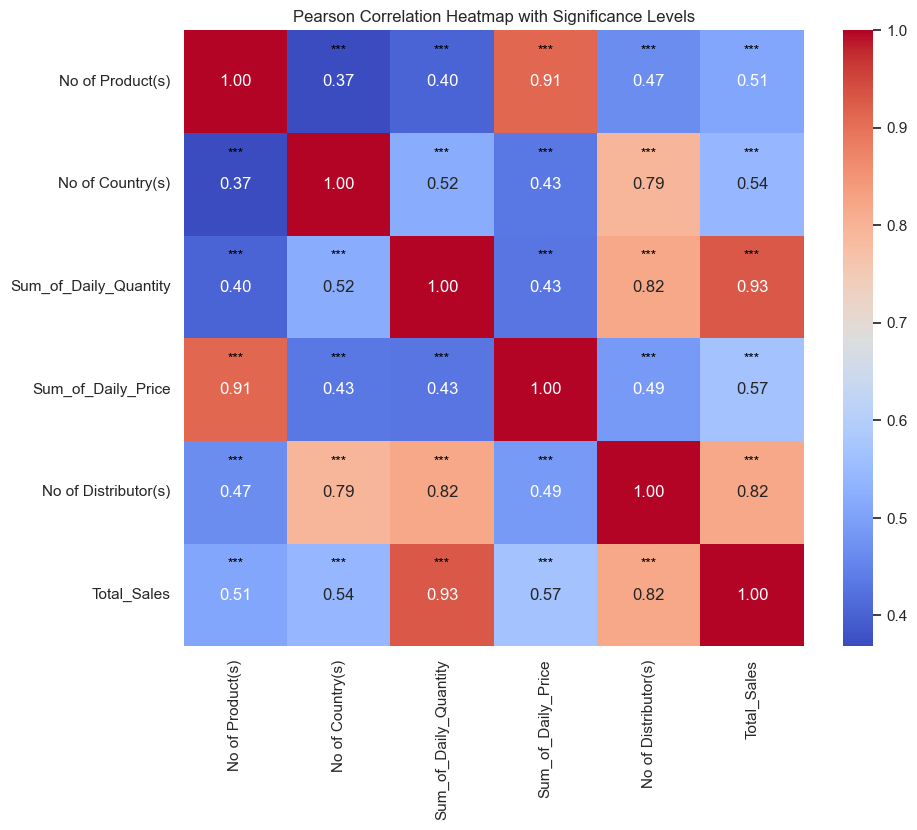

*10% , **5%, ***1% significant level respectively


In [75]:
from scipy.stats import pearsonr
from itertools import product

# From MVA dataframe

# Calculate the correlation matrix
correlation_matrix = mva.corr()

# Calculate p-values for each correlation coefficient
p_values = np.zeros_like(correlation_matrix)
for i in range(len(mva_columns)):
    for j in range(len(mva_columns)):
        if i != j:
            corr, p_value = pearsonr(mva[mva_columns[i]], mva[mva_columns[j]])
            p_values[i, j] = p_value

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True,
            xticklabels=mva_columns, yticklabels=mva_columns)

# Annotate the heatmap with significance levels
for i in range(len(mva_columns)):
    for j in range(len(mva_columns)):
        if i != j:
            if p_values[i, j] < 0.001:
                plt.text(j + 0.5, i + 0.2, '***', ha='center', va='center', fontsize=10, color='black')
            elif p_values[i, j] < 0.01:
                plt.text(j + 0.5, i + 0.2, '**', ha='center', va='center', fontsize=10, color='black')
            elif p_values[i, j] < 0.05:
                plt.text(j + 0.5, i + 0.2, '*', ha='center', va='center', fontsize=10, color='black')

plt.title('Pearson Correlation Heatmap with Significance Levels')

plt.show()

#Display Significane
print("*10% , **5%, ***1% significant level respectively")

In [76]:
# Display the data types of each column
print(mva.dtypes)

No of Product(s)                  int64
No of Country(s)                  int64
Sum_of_Daily_Quantity             int64
Sum_of_Daily_Price              float64
No of Distributor(s)              int64
Total_Sales                     float64
Date_Time                datetime64[ns]
dtype: object


In [77]:
# Check for Final report in the folder
print(Final_report)


Kindly note that the detailed report for this analysis has been uploaded to the folder. Thank you.
